# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import geopandas as gpd
from Bio import Entrez
import time
from tqdm import tqdm
import requests
from Bio import Entrez
import gzip
import subprocess 
from scipy.spatial.distance import cdist

# Read the data

In [2]:
# Read the data 
df = pd.read_csv("/home/chandru/binp37/results/metasub/processed_metasub.csv")
df.head()

/tmp/ipykernel_337048/4278898321.py:2: DtypeWarning: Columns (1,11,12,15,18,19,35,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/chandru/binp37/results/metasub/processed_metasub.csv")


,uuid,metasub_name,core_project,project,city,city_code,latitude,longitude,surface_material,control_type,...,cyanobacterium endosymbiont of Epithemia turgida,endosymbiont 'TC1' of Trimyema compressum,endosymbiont of Acanthamoeba sp. UWC8,endosymbiont of unidentified scaly snail isolate Monju,gamma proteobacterium HdN1,halophilic archaeon DL31,halophilic archaeon True-ADL,secondary endosymbiont of Ctenarytaina eucalypti,secondary endosymbiont of Heteropsylla cubana,uncultured crAssphage
0,haib17CEM4890_H75CGCCXY_SL263639,CSD16-HAM-001,core,CSD16,hamilton,HAM,-37.78333,175.28333,NaN,NaN,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,haib17CEM4890_H75CGCCXY_SL263651,CSD16-HAM-006,core,CSD16,hamilton,HAM,-37.78333,175.28333,NaN,NaN,...,0.0,0.0,0.0,0.00001,0.0,0.0,0.0,0.0,0.0,0.0
2,haib17CEM4890_H75CGCCXY_SL263663,CSD16-HAM-008,core,CSD16,hamilton,HAM,-37.78333,175.28333,NaN,NaN,...,0.0,0.0,0.0,0.00002,0.0,0.0,0.0,0.0,0.0,0.0
3,haib17CEM4890_H75CGCCXY_SL263675,CSD16-HAM-012,core,CSD16,hamilton,HAM,-37.78333,175.28333,NaN,NaN,...,0.0,0.0,0.0,0.00002,0.0,0.0,0.0,0.0,0.0,0.0
4,haib17CEM4890_H75CGCCXY_SL263687,CSD16-HAM-015,core,CSD16,hamilton,HAM,-37.78333,175.28333,NaN,NaN,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
rfe_df = pd.read_csv("/home/chandru/binp37/results/metasub/metasub_training_testing_data.csv")
rfe_df.head()

,Acidovorax ebreus,Acidovorax sp. JS42,Acidovorax sp. KKS102,Acinetobacter baumannii,Acinetobacter haemolyticus,Acinetobacter johnsonii,Acinetobacter junii,Acinetobacter pittii,Acinetobacter schindleri,Acinetobacter sp. LoGeW2-3,...,Variovorax boronicumulans,Variovorax paradoxus,Variovorax sp. PAMC 28711,Veillonella parvula,Weissella cibaria,Xanthomonas campestris,continent,city,latitude,longitude
0,0.00000,0.00000,0.00023,0.00015,0.00000,0.00006,0.00001,0.00007,0.00010,0.00005,...,0.00031,0.00075,0.00021,0.0,0.0,0.00480,oceania,hamilton,-37.78333,175.28333
1,0.00000,0.00001,0.00003,0.00028,0.00016,0.00142,0.00017,0.00013,0.00262,0.00140,...,0.00013,0.00024,0.00003,0.0,0.0,0.00091,oceania,hamilton,-37.78333,175.28333
2,0.00003,0.00000,0.00011,0.00181,0.00060,0.00274,0.00030,0.00110,0.00191,0.00132,...,0.00010,0.00025,0.00001,0.0,0.0,0.00208,oceania,hamilton,-37.78333,175.28333
3,0.00000,0.00000,0.00000,0.00002,0.00001,0.00003,0.00000,0.00000,0.00003,0.00001,...,0.00003,0.00002,0.00000,0.0,0.0,0.00137,oceania,hamilton,-37.78333,175.28333
4,0.00000,0.00000,0.00000,0.00003,0.00000,0.00000,0.00000,0.00002,0.00009,0.00001,...,0.00004,0.00008,0.00003,0.0,0.0,0.00397,oceania,hamilton,-37.78333,175.28333


# Geograpical features

In [4]:
feature_data = df[['city_total_population','city_population_density',
                  'city_land_area_km2','city_ave_june_temp_c','city_elevation_meters','city_koppen_climate','continent','city','latitude','longitude']]

# Fix city elevation of hanoi, yamaguchi in meters
feature_data.loc[feature_data['city'] == 'hanoi','city_elevation_meters'] = 12
feature_data.loc[feature_data['city'] == 'yamaguchi','city_elevation_meters'] = 23
feature_data.loc[feature_data['city'] == 'marseille','city_elevation_meters'] = 42 # city elevation of marseille on google is 42 m here it is 0

# Get city population density, city ladn ares in km2, city avg temp in june and city elevation in meters of offa 
offa_data = {
    'city_population_density': 2500.0,
    'city_land_area_km2': 74.0,
    'city_ave_june_temp_c': 28.0,
    'city_elevation_meters': 457.0
}

feature_data.loc[feature_data['city'] == 'offa', list(offa_data.keys())] = list(offa_data.values())

# Get city land area in km2 of marseille  
feature_data.loc[feature_data['city'] == 'marseille','city_land_area_km2'] = 240

# Fix all the nan values of london
london_data = {
    'city_total_population': 8787892.0,
    'city_population_density': 5590.0,
    'city_land_area_km2': 1572.0,
    'city_ave_june_temp_c': 14.4,
    'city_elevation_meters': 11.0,
    'city_koppen_climate': 'marine_west_coast_climate'
}
feature_data.loc[feature_data['city'] == 'london', list(london_data.keys())] = list(london_data.values())


feature_data.head()

,city_total_population,city_population_density,city_land_area_km2,city_ave_june_temp_c,city_elevation_meters,city_koppen_climate,continent,city,latitude,longitude
0,203100.0,230.0,877.0,17.8,95.0,marine_west_coast_climate,oceania,hamilton,-37.78333,175.28333
1,203100.0,230.0,877.0,17.8,95.0,marine_west_coast_climate,oceania,hamilton,-37.78333,175.28333
2,203100.0,230.0,877.0,17.8,95.0,marine_west_coast_climate,oceania,hamilton,-37.78333,175.28333
3,203100.0,230.0,877.0,17.8,95.0,marine_west_coast_climate,oceania,hamilton,-37.78333,175.28333
4,203100.0,230.0,877.0,17.8,95.0,marine_west_coast_climate,oceania,hamilton,-37.78333,175.28333


## Scaling the features

In [5]:
# Check for skewness in the data before appling long transformer -> 
# Note to self: The city_land_area_km2 is right skewed, so we will go with log scale transformation
#             : THe city_elevation_meters is multi modal there we will go with QuantileTransformer


# Microbiome features

In [6]:
# We can get the raw sequence of all these top hundered species and get a phylogenetic tree to determine the relationship between species.
# We can then use the information as well as a feature to predict the lat and long.

microbe_data = rfe_df.iloc[:,:-4]
microbe_data

,Acidovorax ebreus,Acidovorax sp. JS42,Acidovorax sp. KKS102,Acinetobacter baumannii,Acinetobacter haemolyticus,Acinetobacter johnsonii,Acinetobacter junii,Acinetobacter pittii,Acinetobacter schindleri,Acinetobacter sp. LoGeW2-3,...,Thermothelomyces thermophila,Thielavia terrestris,Truepera radiovictrix,Tsukamurella sp. MH1,Variovorax boronicumulans,Variovorax paradoxus,Variovorax sp. PAMC 28711,Veillonella parvula,Weissella cibaria,Xanthomonas campestris
0,0.00000,0.00000,0.00023,0.00015,0.00000,0.00006,0.00001,0.00007,0.00010,0.00005,...,0.00000,0.00000,0.00000,0.00000,0.00031,0.00075,0.00021,0.00000,0.00000,0.00480
1,0.00000,0.00001,0.00003,0.00028,0.00016,0.00142,0.00017,0.00013,0.00262,0.00140,...,0.00001,0.00001,0.00000,0.00000,0.00013,0.00024,0.00003,0.00000,0.00000,0.00091
2,0.00003,0.00000,0.00011,0.00181,0.00060,0.00274,0.00030,0.00110,0.00191,0.00132,...,0.00000,0.00002,0.00000,0.00000,0.00010,0.00025,0.00001,0.00000,0.00000,0.00208
3,0.00000,0.00000,0.00000,0.00002,0.00001,0.00003,0.00000,0.00000,0.00003,0.00001,...,0.00001,0.00000,0.00000,0.00000,0.00003,0.00002,0.00000,0.00000,0.00000,0.00137
4,0.00000,0.00000,0.00000,0.00003,0.00000,0.00000,0.00000,0.00002,0.00009,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00004,0.00008,0.00003,0.00000,0.00000,0.00397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,0.00044,0.00052,0.00019,0.00072,0.00015,0.01410,0.00036,0.00046,0.00052,0.00024,...,0.00091,0.00124,0.00009,0.00000,0.00037,0.00107,0.00016,0.00042,0.00013,0.00132
4066,0.00000,0.00000,0.00022,0.00014,0.00000,0.00019,0.00000,0.00000,0.00000,0.00000,...,0.01762,0.00703,0.00000,0.00105,0.00147,0.00350,0.00113,0.00012,0.00002,0.00079
4067,0.00003,0.00002,0.00002,0.00018,0.00009,0.00055,0.00006,0.00019,0.00009,0.00001,...,0.00023,0.00031,0.00002,0.00006,0.00005,0.00016,0.00011,0.00057,0.00001,0.00043
4068,0.00026,0.00038,0.00051,0.00009,0.00000,0.00025,0.00004,0.00010,0.00006,0.00000,...,0.00443,0.00535,0.00000,0.00186,0.00128,0.00304,0.00126,0.00013,0.00008,0.00106


## Phylogenetic Trees

In [ ]:
species_list = []
for name in microbe_data.columns:
    species_list.append(name)
    

tax_df = pd.read_csv("/home/chandru/binp37/results/metasub/taxonomic_info.csv")
lin_df = tax_df[tax_df['Species'].isin(species_list)].dropna(axis=1,how='all')
lin_df = lin_df.dropna(subset=lin_df.columns[1:7]).iloc[:,:7]
lin_df.head()

,Species,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
36,Acidovorax ebreus,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales
37,Acidovorax sp. JS42,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales
38,Acidovorax sp. KKS102,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales
44,Acinetobacter baumannii,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales
48,Acinetobacter haemolyticus,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales


In [33]:
np.unique(lin_df['Rank_1'],return_counts=True)

(array(['Viruses', 'cellular organisms'], dtype=object), array([  3, 193]))

In [ ]:
filtered_species_list = list(lin_df['Species'].values)
filtered_species_list[:5]

['Acidovorax ebreus',
 'Acidovorax sp. JS42',
 'Acidovorax sp. KKS102',
 'Acinetobacter baumannii',
 'Acinetobacter haemolyticus',
 'Acinetobacter johnsonii',
 'Acinetobacter junii',
 'Acinetobacter pittii',
 'Acinetobacter schindleri',
 'Acinetobacter sp. LoGeW2-3',
 'Actinomyces radicidentis',
 'Aeromonas sp. ASNIH5',
 'Alteromonas macleodii',
 'Arsenicicoccus sp. oral taxon 190',
 'Bacillus megaterium',
 'Bacillus subtilis',
 'Bradyrhizobium diazoefficiens',
 'Bradyrhizobium japonicum',
 'Bradyrhizobium sp.',
 'Bradyrhizobium sp. BTAi1',
 'Bradyrhizobium sp. CCGE-LA001',
 'Bradyrhizobium sp. S23321',
 'Bradyrhizobium sp. SK17',
 'Brevundimonas naejangsanensis',
 'Brevundimonas sp. DS20',
 'Brevundimonas sp. GW460-12-10-14-LB2',
 'Brevundimonas sp. LM2',
 'Brevundimonas subvibrioides',
 'Brevundimonas vesicularis',
 'Brochothrix thermosphacta',
 'Calothrix sp. NIES-4071',
 'Candida dubliniensis',
 'Carnobacterium inhibens',
 'Chroococcidiopsis thermalis',
 'Chryseobacterium indologen

In [31]:

Entrez.email = "1ms19bt011@gmail.com" # Remember to set your actual email

def download_genome(species, output_dir="genomes"):
    """
    Downloads the complete genome for a given species from NCBI RefSeq,
    handling both FTP and HTTP URLs.

    Args:
        species (str): The scientific name of the species (e.g., "Escherichia coli").
        output_dir (str): The directory where the genome file will be saved.

    Returns:
        bool: True if the genome was successfully downloaded and decompressed, False otherwise.
    """
    os.makedirs(output_dir, exist_ok=True)

    search_terms = [
        f'"{species}"[Organism] AND "complete genome"[Assembly Level]',
        f'"{species}"[Organism] AND "reference genome"[Refseq Category]',
        f'"{species}"[Organism] AND latest[filter]',
        f'"{species}"[Organism]' # Broadest term as a last resort
    ]

    for term_index, term in enumerate(search_terms):
        print(f"Searching for '{species}' with term: '{term}'")
        try:
            # Search for latest RefSeq assembly
            handle = Entrez.esearch(db="assembly", term=term, retmax=1)
            record = Entrez.read(handle)
            handle.close() # Always close the handle

            if record["IdList"]:
                assembly_id = record["IdList"][0]
                print(f"Found assembly ID: {assembly_id} for {species}")

                # Fetch summary to get FTP path
                summary_handle = Entrez.esummary(db="assembly", id=assembly_id)
                doc = Entrez.read(summary_handle)
                summary_handle.close() # Always close the handle

                ftp_path = doc["DocumentSummarySet"]["DocumentSummary"][0]["FtpPath_RefSeq"]
                if ftp_path:
                    filename_stem = ftp_path.split("/")[-1]
                    fasta_url = f"{ftp_path}/{filename_stem}_genomic.fna.gz"
                    output_gz_path = os.path.join(output_dir, f"{species.replace(' ', '_')}.fna.gz")
                    output_fna_path = os.path.join(output_dir, f"{species.replace(' ', '_')}.fna")

                    print(f"Attempting to download from: {fasta_url}")

                    try:
                        if fasta_url.startswith("ftp://"):
                            # Use wget for FTP paths
                            print(f"Using wget for FTP download: {fasta_url}")
                            # -q for quiet, -O for output file, --show-progress for progress bar
                            # --no-verbose for cleaner output
                            # Use subprocess.run for better control and error handling than os.system
                            result = subprocess.run(
                                ["wget", "--no-verbose", "--show-progress", "-O", output_gz_path, fasta_url],
                                check=True, # Raise CalledProcessError if wget returns non-zero exit code
                                capture_output=True, # Capture stdout/stderr for debugging if needed
                                text=True # Decode stdout/stderr as text
                            )
                            # print(result.stdout) # Uncomment for detailed wget output
                            # print(result.stderr) # Uncomment for detailed wget output
                            print(f"Downloaded {species} to {output_gz_path} using wget.")
                        else:
                            # Use requests for HTTP/HTTPS paths
                            print(f"Using requests for HTTP/HTTPS download: {fasta_url}")
                            response = requests.get(fasta_url, stream=True)
                            response.raise_for_status() # Raise an exception for HTTP errors

                            total_size_in_bytes = int(response.headers.get('content-length', 0))
                            block_size = 1024 # 1 Kibibyte
                            progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True, desc=f"Downloading {species}")

                            with open(output_gz_path, 'wb') as f:
                                for chunk in response.iter_content(chunk_size=block_size):
                                    progress_bar.update(len(chunk))
                                    f.write(chunk)
                            progress_bar.close()

                            if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
                                print("ERROR, something went wrong during download!")
                                return False
                            print(f"Downloaded {species} to {output_gz_path} using requests.")

                        # Decompress the file, regardless of how it was downloaded
                        print(f"Decompressing {output_gz_path}...")
                        with gzip.open(output_gz_path, 'rb') as f_in:
                            with open(output_fna_path, 'wb') as f_out:
                                f_out.write(f_in.read())
                        os.remove(output_gz_path) # Remove the compressed file
                        print(f"Decompressed to {output_fna_path}")
                        return True
                    except subprocess.CalledProcessError as sub_e:
                        print(f"wget failed for {species} from {fasta_url}: {sub_e}")
                        print(f"wget stdout: {sub_e.stdout}")
                        print(f"wget stderr: {sub_e.stderr}")
                        continue # Try next search term
                    except requests.exceptions.RequestException as req_e:
                        print(f"Download failed for {species} from {fasta_url}: {req_e}")
                        continue # Try next search term
                    except Exception as download_e:
                        print(f"An unexpected error occurred during download/decompression for {species}: {download_e}")
                        continue # Try next search term
                else:
                    print(f"No FTP path found for {species} with term '{term}'. Trying next search term.")
            else:
                print(f"No assembly found for {species} with term '{term}'. Trying next search term.")
            time.sleep(1) # Small delay between Entrez calls to be polite
        except Exception as e:
            print(f"Error during Entrez search for {species} with term '{term}': {e}")
            time.sleep(2) # Longer delay if Entrez call itself fails
    print(f"Failed to download genome for {species} after trying all search terms.")
    return False


output_directory = "genomes"
os.makedirs(output_directory, exist_ok=True)

# Process each species in the list
print("\nStarting genome download process...")
for species in tqdm(filtered_species_list[:], desc="Overall Genome Download Progress"):
    print(f"\nProcessing species: {species}")
    success = download_genome(species, output_directory)
    if not success:
        print(f"Could not download genome for {species}. Please check the species name or try again later.")
    time.sleep(2) # Respect NCBI rate limits between species


Starting genome download process...


Overall Genome Download Progress:   0%|          | 0/196 [00:00<?, ?it/s]


Processing species: Acidovorax ebreus
Searching for 'Acidovorax ebreus' with term: '"Acidovorax ebreus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 43248 for Acidovorax ebreus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/022/305/GCF_000022305.1_ASM2230v1/GCF_000022305.1_ASM2230v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/022/305/GCF_000022305.1_ASM2230v1/GCF_000022305.1_ASM2230v1_genomic.fna.gz
Downloaded Acidovorax ebreus to genomes/Acidovorax_ebreus.fna.gz using wget.
Decompressing genomes/Acidovorax_ebreus.fna.gz...
Decompressed to genomes/Acidovorax_ebreus.fna


Overall Genome Download Progress:   1%|          | 1/196 [00:05<16:35,  5.10s/it]


Processing species: Acidovorax sp. JS42
Searching for 'Acidovorax sp. JS42' with term: '"Acidovorax sp. JS42"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 36648 for Acidovorax sp. JS42
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/545/GCF_000015545.1_ASM1554v1/GCF_000015545.1_ASM1554v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/545/GCF_000015545.1_ASM1554v1/GCF_000015545.1_ASM1554v1_genomic.fna.gz
Downloaded Acidovorax sp. JS42 to genomes/Acidovorax_sp._JS42.fna.gz using wget.
Decompressing genomes/Acidovorax_sp._JS42.fna.gz...
Decompressed to genomes/Acidovorax_sp._JS42.fna


Overall Genome Download Progress:   1%|          | 2/196 [00:09<16:05,  4.98s/it]


Processing species: Acidovorax sp. KKS102
Searching for 'Acidovorax sp. KKS102' with term: '"Acidovorax sp. KKS102"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 438548 for Acidovorax sp. KKS102
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/302/535/GCF_000302535.1_ASM30253v1/GCF_000302535.1_ASM30253v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/302/535/GCF_000302535.1_ASM30253v1/GCF_000302535.1_ASM30253v1_genomic.fna.gz
Downloaded Acidovorax sp. KKS102 to genomes/Acidovorax_sp._KKS102.fna.gz using wget.
Decompressing genomes/Acidovorax_sp._KKS102.fna.gz...
Decompressed to genomes/Acidovorax_sp._KKS102.fna


Overall Genome Download Progress:   2%|▏         | 3/196 [00:14<15:45,  4.90s/it]


Processing species: Acinetobacter baumannii
Searching for 'Acinetobacter baumannii' with term: '"Acinetobacter baumannii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75270728 for Acinetobacter baumannii
No FTP path found for Acinetobacter baumannii with term '"Acinetobacter baumannii"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Acinetobacter baumannii' with term: '"Acinetobacter baumannii"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 4887331 for Acinetobacter baumannii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/035/845/GCF_009035845.1_ASM903584v1/GCF_009035845.1_ASM903584v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/035/845/GCF_009035845.1_ASM903584v1/GCF_009035845.1_ASM903584v1_genomic.fna.gz
Downloaded Acinetobacter baumannii to genomes/Acinetobacter_baumannii.fna.gz using wget.
Decompressing genomes/Acinetoba

Overall Genome Download Progress:   2%|▏         | 4/196 [00:21<17:36,  5.50s/it]


Processing species: Acinetobacter haemolyticus
Searching for 'Acinetobacter haemolyticus' with term: '"Acinetobacter haemolyticus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 19927471 for Acinetobacter haemolyticus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/034/047/135/GCF_034047135.1_ASM3404713v1/GCF_034047135.1_ASM3404713v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/034/047/135/GCF_034047135.1_ASM3404713v1/GCF_034047135.1_ASM3404713v1_genomic.fna.gz
Downloaded Acinetobacter haemolyticus to genomes/Acinetobacter_haemolyticus.fna.gz using wget.
Decompressing genomes/Acinetobacter_haemolyticus.fna.gz...
Decompressed to genomes/Acinetobacter_haemolyticus.fna


Overall Genome Download Progress:   3%|▎         | 5/196 [00:26<16:55,  5.32s/it]


Processing species: Acinetobacter johnsonii
Searching for 'Acinetobacter johnsonii' with term: '"Acinetobacter johnsonii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73774308 for Acinetobacter johnsonii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/157/305/GCF_050157305.1_ASM5015730v1/GCF_050157305.1_ASM5015730v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/157/305/GCF_050157305.1_ASM5015730v1/GCF_050157305.1_ASM5015730v1_genomic.fna.gz
Downloaded Acinetobacter johnsonii to genomes/Acinetobacter_johnsonii.fna.gz using wget.
Decompressing genomes/Acinetobacter_johnsonii.fna.gz...
Decompressed to genomes/Acinetobacter_johnsonii.fna


Overall Genome Download Progress:   3%|▎         | 6/196 [00:31<16:31,  5.22s/it]


Processing species: Acinetobacter junii
Searching for 'Acinetobacter junii' with term: '"Acinetobacter junii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 20696781 for Acinetobacter junii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/035/320/785/GCF_035320785.1_ASM3532078v1/GCF_035320785.1_ASM3532078v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/035/320/785/GCF_035320785.1_ASM3532078v1/GCF_035320785.1_ASM3532078v1_genomic.fna.gz
Downloaded Acinetobacter junii to genomes/Acinetobacter_junii.fna.gz using wget.
Decompressing genomes/Acinetobacter_junii.fna.gz...
Decompressed to genomes/Acinetobacter_junii.fna


Overall Genome Download Progress:   4%|▎         | 7/196 [00:36<16:06,  5.11s/it]


Processing species: Acinetobacter pittii
Searching for 'Acinetobacter pittii' with term: '"Acinetobacter pittii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74063218 for Acinetobacter pittii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/367/435/GCF_050367435.1_De_novo/GCF_050367435.1_De_novo_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/367/435/GCF_050367435.1_De_novo/GCF_050367435.1_De_novo_genomic.fna.gz
Downloaded Acinetobacter pittii to genomes/Acinetobacter_pittii.fna.gz using wget.
Decompressing genomes/Acinetobacter_pittii.fna.gz...
Decompressed to genomes/Acinetobacter_pittii.fna


Overall Genome Download Progress:   4%|▍         | 8/196 [00:41<16:04,  5.13s/it]


Processing species: Acinetobacter schindleri
Searching for 'Acinetobacter schindleri' with term: '"Acinetobacter schindleri"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 15904821 for Acinetobacter schindleri
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/028/657/965/GCF_028657965.1_ASM2865796v1/GCF_028657965.1_ASM2865796v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/028/657/965/GCF_028657965.1_ASM2865796v1/GCF_028657965.1_ASM2865796v1_genomic.fna.gz
Downloaded Acinetobacter schindleri to genomes/Acinetobacter_schindleri.fna.gz using wget.
Decompressing genomes/Acinetobacter_schindleri.fna.gz...
Decompressed to genomes/Acinetobacter_schindleri.fna


Overall Genome Download Progress:   5%|▍         | 9/196 [00:46<15:40,  5.03s/it]


Processing species: Acinetobacter sp. LoGeW2-3
Searching for 'Acinetobacter sp. LoGeW2-3' with term: '"Acinetobacter sp. LoGeW2-3"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1397001 for Acinetobacter sp. LoGeW2-3
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/688/565/GCF_002688565.1_ASM268856v1/GCF_002688565.1_ASM268856v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/688/565/GCF_002688565.1_ASM268856v1/GCF_002688565.1_ASM268856v1_genomic.fna.gz
Downloaded Acinetobacter sp. LoGeW2-3 to genomes/Acinetobacter_sp._LoGeW2-3.fna.gz using wget.
Decompressing genomes/Acinetobacter_sp._LoGeW2-3.fna.gz...
Decompressed to genomes/Acinetobacter_sp._LoGeW2-3.fna


Overall Genome Download Progress:   5%|▌         | 10/196 [00:50<15:15,  4.92s/it]


Processing species: Actinomyces radicidentis
Searching for 'Actinomyces radicidentis' with term: '"Actinomyces radicidentis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 638291 for Actinomyces radicidentis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/553/565/GCF_001553565.1_ASM155356v1/GCF_001553565.1_ASM155356v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/553/565/GCF_001553565.1_ASM155356v1/GCF_001553565.1_ASM155356v1_genomic.fna.gz
Downloaded Actinomyces radicidentis to genomes/Actinomyces_radicidentis.fna.gz using wget.
Decompressing genomes/Actinomyces_radicidentis.fna.gz...
Decompressed to genomes/Actinomyces_radicidentis.fna


Overall Genome Download Progress:   6%|▌         | 11/196 [00:55<15:07,  4.91s/it]


Processing species: Aeromonas sp. ASNIH5
Searching for 'Aeromonas sp. ASNIH5' with term: '"Aeromonas sp. ASNIH5"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1545531 for Aeromonas sp. ASNIH5
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/902/865/GCF_002902865.1_ASM290286v1/GCF_002902865.1_ASM290286v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/902/865/GCF_002902865.1_ASM290286v1/GCF_002902865.1_ASM290286v1_genomic.fna.gz
Downloaded Aeromonas sp. ASNIH5 to genomes/Aeromonas_sp._ASNIH5.fna.gz using wget.
Decompressing genomes/Aeromonas_sp._ASNIH5.fna.gz...
Decompressed to genomes/Aeromonas_sp._ASNIH5.fna


Overall Genome Download Progress:   6%|▌         | 12/196 [01:00<15:08,  4.94s/it]


Processing species: Alteromonas macleodii
Searching for 'Alteromonas macleodii' with term: '"Alteromonas macleodii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75066938 for Alteromonas macleodii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/058/755/GCF_051058755.1_NiSOD_KO/GCF_051058755.1_NiSOD_KO_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/058/755/GCF_051058755.1_NiSOD_KO/GCF_051058755.1_NiSOD_KO_genomic.fna.gz
Downloaded Alteromonas macleodii to genomes/Alteromonas_macleodii.fna.gz using wget.
Decompressing genomes/Alteromonas_macleodii.fna.gz...
Decompressed to genomes/Alteromonas_macleodii.fna


Overall Genome Download Progress:   7%|▋         | 13/196 [01:05<14:49,  4.86s/it]


Processing species: Arsenicicoccus sp. oral taxon 190
Searching for 'Arsenicicoccus sp. oral taxon 190' with term: '"Arsenicicoccus sp. oral taxon 190"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 432121 for Arsenicicoccus sp. oral taxon 190
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/189/535/GCF_001189535.1_ASM118953v1/GCF_001189535.1_ASM118953v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/189/535/GCF_001189535.1_ASM118953v1/GCF_001189535.1_ASM118953v1_genomic.fna.gz
Downloaded Arsenicicoccus sp. oral taxon 190 to genomes/Arsenicicoccus_sp._oral_taxon_190.fna.gz using wget.
Decompressing genomes/Arsenicicoccus_sp._oral_taxon_190.fna.gz...
Decompressed to genomes/Arsenicicoccus_sp._oral_taxon_190.fna


Overall Genome Download Progress:   7%|▋         | 14/196 [01:10<14:42,  4.85s/it]


Processing species: Bacillus megaterium
Searching for 'Bacillus megaterium' with term: '"Bacillus megaterium"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73828068 for Bacillus megaterium
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/209/755/GCF_050209755.1_ASM5020975v1/GCF_050209755.1_ASM5020975v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/209/755/GCF_050209755.1_ASM5020975v1/GCF_050209755.1_ASM5020975v1_genomic.fna.gz
Downloaded Bacillus megaterium to genomes/Bacillus_megaterium.fna.gz using wget.
Decompressing genomes/Bacillus_megaterium.fna.gz...
Decompressed to genomes/Bacillus_megaterium.fna


Overall Genome Download Progress:   8%|▊         | 15/196 [01:15<14:44,  4.89s/it]


Processing species: Bacillus subtilis
Searching for 'Bacillus subtilis' with term: '"Bacillus subtilis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75172448 for Bacillus subtilis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/132/585/GCF_051132585.1_ASM5113258v1/GCF_051132585.1_ASM5113258v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/132/585/GCF_051132585.1_ASM5113258v1/GCF_051132585.1_ASM5113258v1_genomic.fna.gz
Downloaded Bacillus subtilis to genomes/Bacillus_subtilis.fna.gz using wget.
Decompressing genomes/Bacillus_subtilis.fna.gz...
Decompressed to genomes/Bacillus_subtilis.fna


Overall Genome Download Progress:   8%|▊         | 16/196 [01:20<15:09,  5.05s/it]


Processing species: Bradyrhizobium diazoefficiens
Searching for 'Bradyrhizobium diazoefficiens' with term: '"Bradyrhizobium diazoefficiens"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 70875758 for Bradyrhizobium diazoefficiens
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/047/948/265/GCF_047948265.1_Bd1/GCF_047948265.1_Bd1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/047/948/265/GCF_047948265.1_Bd1/GCF_047948265.1_Bd1_genomic.fna.gz
Downloaded Bradyrhizobium diazoefficiens to genomes/Bradyrhizobium_diazoefficiens.fna.gz using wget.
Decompressing genomes/Bradyrhizobium_diazoefficiens.fna.gz...
Decompressed to genomes/Bradyrhizobium_diazoefficiens.fna


Overall Genome Download Progress:   9%|▊         | 17/196 [01:25<15:00,  5.03s/it]


Processing species: Bradyrhizobium japonicum
Searching for 'Bradyrhizobium japonicum' with term: '"Bradyrhizobium japonicum"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74414388 for Bradyrhizobium japonicum
No FTP path found for Bradyrhizobium japonicum with term '"Bradyrhizobium japonicum"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Bradyrhizobium japonicum' with term: '"Bradyrhizobium japonicum"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 7579501 for Bradyrhizobium japonicum
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/013/752/735/GCF_013752735.1_ASM1375273v1/GCF_013752735.1_ASM1375273v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/013/752/735/GCF_013752735.1_ASM1375273v1/GCF_013752735.1_ASM1375273v1_genomic.fna.gz
Downloaded Bradyrhizobium japonicum to genomes/Bradyrhizobium_japonicum.fna.gz using wget.
Decompressing ge

Overall Genome Download Progress:   9%|▉         | 18/196 [01:32<16:42,  5.63s/it]


Processing species: Bradyrhizobium sp.
Searching for 'Bradyrhizobium sp.' with term: '"Bradyrhizobium sp."[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 739881 for Bradyrhizobium sp.
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/011/245/GCF_900011245.1_BF49.v1/GCF_900011245.1_BF49.v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/011/245/GCF_900011245.1_BF49.v1/GCF_900011245.1_BF49.v1_genomic.fna.gz
Downloaded Bradyrhizobium sp. to genomes/Bradyrhizobium_sp..fna.gz using wget.
Decompressing genomes/Bradyrhizobium_sp..fna.gz...
Decompressed to genomes/Bradyrhizobium_sp..fna


Overall Genome Download Progress:  10%|▉         | 19/196 [01:37<16:03,  5.44s/it]


Processing species: Bradyrhizobium sp. BTAi1
Searching for 'Bradyrhizobium sp. BTAi1' with term: '"Bradyrhizobium sp. BTAi1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 36268 for Bradyrhizobium sp. BTAi1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/165/GCF_000015165.1_ASM1516v1/GCF_000015165.1_ASM1516v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/165/GCF_000015165.1_ASM1516v1/GCF_000015165.1_ASM1516v1_genomic.fna.gz
Downloaded Bradyrhizobium sp. BTAi1 to genomes/Bradyrhizobium_sp._BTAi1.fna.gz using wget.
Decompressing genomes/Bradyrhizobium_sp._BTAi1.fna.gz...
Decompressed to genomes/Bradyrhizobium_sp._BTAi1.fna


Overall Genome Download Progress:  10%|█         | 20/196 [01:42<15:41,  5.35s/it]


Processing species: Bradyrhizobium sp. CCGE-LA001
Searching for 'Bradyrhizobium sp. CCGE-LA001' with term: '"Bradyrhizobium sp. CCGE-LA001"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 631871 for Bradyrhizobium sp. CCGE-LA001
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/296/215/GCF_000296215.2_ASM29621v2/GCF_000296215.2_ASM29621v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/296/215/GCF_000296215.2_ASM29621v2/GCF_000296215.2_ASM29621v2_genomic.fna.gz
Downloaded Bradyrhizobium sp. CCGE-LA001 to genomes/Bradyrhizobium_sp._CCGE-LA001.fna.gz using wget.
Decompressing genomes/Bradyrhizobium_sp._CCGE-LA001.fna.gz...
Decompressed to genomes/Bradyrhizobium_sp._CCGE-LA001.fna


Overall Genome Download Progress:  11%|█         | 21/196 [01:47<15:30,  5.31s/it]


Processing species: Bradyrhizobium sp. S23321
Searching for 'Bradyrhizobium sp. S23321' with term: '"Bradyrhizobium sp. S23321"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 21537831 for Bradyrhizobium sp. S23321
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/007/290/395/GCF_007290395.2_ASM729039v2/GCF_007290395.2_ASM729039v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/007/290/395/GCF_007290395.2_ASM729039v2/GCF_007290395.2_ASM729039v2_genomic.fna.gz
Downloaded Bradyrhizobium sp. S23321 to genomes/Bradyrhizobium_sp._S23321.fna.gz using wget.
Decompressing genomes/Bradyrhizobium_sp._S23321.fna.gz...
Decompressed to genomes/Bradyrhizobium_sp._S23321.fna


Overall Genome Download Progress:  11%|█         | 22/196 [01:52<15:09,  5.23s/it]


Processing species: Bradyrhizobium sp. SK17
Searching for 'Bradyrhizobium sp. SK17' with term: '"Bradyrhizobium sp. SK17"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1469661 for Bradyrhizobium sp. SK17
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/831/585/GCF_002831585.1_ASM283158v1/GCF_002831585.1_ASM283158v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/831/585/GCF_002831585.1_ASM283158v1/GCF_002831585.1_ASM283158v1_genomic.fna.gz
Downloaded Bradyrhizobium sp. SK17 to genomes/Bradyrhizobium_sp._SK17.fna.gz using wget.
Decompressing genomes/Bradyrhizobium_sp._SK17.fna.gz...
Decompressed to genomes/Bradyrhizobium_sp._SK17.fna


Overall Genome Download Progress:  12%|█▏        | 23/196 [01:58<14:56,  5.18s/it]


Processing species: Brevundimonas naejangsanensis
Searching for 'Brevundimonas naejangsanensis' with term: '"Brevundimonas naejangsanensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 2380151 for Brevundimonas naejangsanensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/004/421/065/GCF_004421065.1_ASM442106v1/GCF_004421065.1_ASM442106v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/004/421/065/GCF_004421065.1_ASM442106v1/GCF_004421065.1_ASM442106v1_genomic.fna.gz
Downloaded Brevundimonas naejangsanensis to genomes/Brevundimonas_naejangsanensis.fna.gz using wget.
Decompressing genomes/Brevundimonas_naejangsanensis.fna.gz...
Decompressed to genomes/Brevundimonas_naejangsanensis.fna


Overall Genome Download Progress:  12%|█▏        | 24/196 [02:02<14:33,  5.08s/it]


Processing species: Brevundimonas sp. DS20
Searching for 'Brevundimonas sp. DS20' with term: '"Brevundimonas sp. DS20"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 500431 for Brevundimonas sp. DS20
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/310/255/GCF_001310255.1_ASM131025v1/GCF_001310255.1_ASM131025v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/310/255/GCF_001310255.1_ASM131025v1/GCF_001310255.1_ASM131025v1_genomic.fna.gz
Downloaded Brevundimonas sp. DS20 to genomes/Brevundimonas_sp._DS20.fna.gz using wget.
Decompressing genomes/Brevundimonas_sp._DS20.fna.gz...
Decompressed to genomes/Brevundimonas_sp._DS20.fna


Overall Genome Download Progress:  13%|█▎        | 25/196 [02:07<14:22,  5.04s/it]


Processing species: Brevundimonas sp. GW460-12-10-14-LB2
Searching for 'Brevundimonas sp. GW460-12-10-14-LB2' with term: '"Brevundimonas sp. GW460-12-10-14-LB2"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 734031 for Brevundimonas sp. GW460-12-10-14-LB2
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/636/925/GCF_001636925.1_ASM163692v1/GCF_001636925.1_ASM163692v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/636/925/GCF_001636925.1_ASM163692v1/GCF_001636925.1_ASM163692v1_genomic.fna.gz
Downloaded Brevundimonas sp. GW460-12-10-14-LB2 to genomes/Brevundimonas_sp._GW460-12-10-14-LB2.fna.gz using wget.
Decompressing genomes/Brevundimonas_sp._GW460-12-10-14-LB2.fna.gz...
Decompressed to genomes/Brevundimonas_sp._GW460-12-10-14-LB2.fna


Overall Genome Download Progress:  13%|█▎        | 26/196 [02:12<14:04,  4.97s/it]


Processing species: Brevundimonas sp. LM2
Searching for 'Brevundimonas sp. LM2' with term: '"Brevundimonas sp. LM2"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1007991 for Brevundimonas sp. LM2
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/002/865/GCF_002002865.1_ASM200286v1/GCF_002002865.1_ASM200286v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/002/865/GCF_002002865.1_ASM200286v1/GCF_002002865.1_ASM200286v1_genomic.fna.gz
Downloaded Brevundimonas sp. LM2 to genomes/Brevundimonas_sp._LM2.fna.gz using wget.
Decompressing genomes/Brevundimonas_sp._LM2.fna.gz...
Decompressed to genomes/Brevundimonas_sp._LM2.fna


Overall Genome Download Progress:  14%|█▍        | 27/196 [02:17<13:50,  4.91s/it]


Processing species: Brevundimonas subvibrioides
Searching for 'Brevundimonas subvibrioides' with term: '"Brevundimonas subvibrioides"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 59514848 for Brevundimonas subvibrioides
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/964/034/995/GCF_964034995.1_MM232/GCF_964034995.1_MM232_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/964/034/995/GCF_964034995.1_MM232/GCF_964034995.1_MM232_genomic.fna.gz
Downloaded Brevundimonas subvibrioides to genomes/Brevundimonas_subvibrioides.fna.gz using wget.
Decompressing genomes/Brevundimonas_subvibrioides.fna.gz...
Decompressed to genomes/Brevundimonas_subvibrioides.fna


Overall Genome Download Progress:  14%|█▍        | 28/196 [02:22<13:40,  4.89s/it]


Processing species: Brevundimonas vesicularis
Searching for 'Brevundimonas vesicularis' with term: '"Brevundimonas vesicularis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 67301318 for Brevundimonas vesicularis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/114/465/GCF_046114465.1_ASM4611446v1/GCF_046114465.1_ASM4611446v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/114/465/GCF_046114465.1_ASM4611446v1/GCF_046114465.1_ASM4611446v1_genomic.fna.gz
Downloaded Brevundimonas vesicularis to genomes/Brevundimonas_vesicularis.fna.gz using wget.
Decompressing genomes/Brevundimonas_vesicularis.fna.gz...
Decompressed to genomes/Brevundimonas_vesicularis.fna


Overall Genome Download Progress:  15%|█▍        | 29/196 [02:26<13:28,  4.84s/it]


Processing species: Brochothrix thermosphacta
Searching for 'Brochothrix thermosphacta' with term: '"Brochothrix thermosphacta"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 54266968 for Brochothrix thermosphacta
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/036/884/295/GCF_036884295.1_ASM3688429v1/GCF_036884295.1_ASM3688429v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/036/884/295/GCF_036884295.1_ASM3688429v1/GCF_036884295.1_ASM3688429v1_genomic.fna.gz
Downloaded Brochothrix thermosphacta to genomes/Brochothrix_thermosphacta.fna.gz using wget.
Decompressing genomes/Brochothrix_thermosphacta.fna.gz...
Decompressed to genomes/Brochothrix_thermosphacta.fna


Overall Genome Download Progress:  15%|█▌        | 30/196 [02:32<13:33,  4.90s/it]


Processing species: Calothrix sp. NIES-4071
Searching for 'Calothrix sp. NIES-4071' with term: '"Calothrix sp. NIES-4071"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1232631 for Calothrix sp. NIES-4071
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/368/455/GCF_002368455.1_ASM236845v1/GCF_002368455.1_ASM236845v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/368/455/GCF_002368455.1_ASM236845v1/GCF_002368455.1_ASM236845v1_genomic.fna.gz
Downloaded Calothrix sp. NIES-4071 to genomes/Calothrix_sp._NIES-4071.fna.gz using wget.
Decompressing genomes/Calothrix_sp._NIES-4071.fna.gz...
Decompressed to genomes/Calothrix_sp._NIES-4071.fna


Overall Genome Download Progress:  16%|█▌        | 31/196 [02:37<13:43,  4.99s/it]


Processing species: Candida dubliniensis
Searching for 'Candida dubliniensis' with term: '"Candida dubliniensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 101528 for Candida dubliniensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/945/GCF_000026945.1_ASM2694v1/GCF_000026945.1_ASM2694v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/026/945/GCF_000026945.1_ASM2694v1/GCF_000026945.1_ASM2694v1_genomic.fna.gz
Downloaded Candida dubliniensis to genomes/Candida_dubliniensis.fna.gz using wget.
Decompressing genomes/Candida_dubliniensis.fna.gz...
Decompressed to genomes/Candida_dubliniensis.fna


Overall Genome Download Progress:  16%|█▋        | 32/196 [02:42<13:45,  5.04s/it]


Processing species: Carnobacterium inhibens
Searching for 'Carnobacterium inhibens' with term: '"Carnobacterium inhibens"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 78721 for Carnobacterium inhibens
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/493/735/GCF_000493735.1_ASM49373v1/GCF_000493735.1_ASM49373v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/493/735/GCF_000493735.1_ASM49373v1/GCF_000493735.1_ASM49373v1_genomic.fna.gz
Downloaded Carnobacterium inhibens to genomes/Carnobacterium_inhibens.fna.gz using wget.
Decompressing genomes/Carnobacterium_inhibens.fna.gz...
Decompressed to genomes/Carnobacterium_inhibens.fna


Overall Genome Download Progress:  17%|█▋        | 33/196 [02:46<13:19,  4.91s/it]


Processing species: Chroococcidiopsis thermalis
Searching for 'Chroococcidiopsis thermalis' with term: '"Chroococcidiopsis thermalis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 517138 for Chroococcidiopsis thermalis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/317/125/GCF_000317125.1_ASM31712v1/GCF_000317125.1_ASM31712v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/317/125/GCF_000317125.1_ASM31712v1/GCF_000317125.1_ASM31712v1_genomic.fna.gz
Downloaded Chroococcidiopsis thermalis to genomes/Chroococcidiopsis_thermalis.fna.gz using wget.
Decompressing genomes/Chroococcidiopsis_thermalis.fna.gz...
Decompressed to genomes/Chroococcidiopsis_thermalis.fna


Overall Genome Download Progress:  17%|█▋        | 34/196 [02:52<13:19,  4.94s/it]


Processing species: Chryseobacterium indologenes
Searching for 'Chryseobacterium indologenes' with term: '"Chryseobacterium indologenes"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74745678 for Chryseobacterium indologenes
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/821/985/GCF_050821985.1_ASM5082198v1/GCF_050821985.1_ASM5082198v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/821/985/GCF_050821985.1_ASM5082198v1/GCF_050821985.1_ASM5082198v1_genomic.fna.gz
Downloaded Chryseobacterium indologenes to genomes/Chryseobacterium_indologenes.fna.gz using wget.
Decompressing genomes/Chryseobacterium_indologenes.fna.gz...
Decompressed to genomes/Chryseobacterium_indologenes.fna


Overall Genome Download Progress:  18%|█▊        | 35/196 [02:56<13:09,  4.91s/it]


Processing species: Chryseobacterium taklimakanense
Searching for 'Chryseobacterium taklimakanense' with term: '"Chryseobacterium taklimakanense"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 2129641 for Chryseobacterium taklimakanense
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/860/545/GCF_003860545.1_ASM386054v1/GCF_003860545.1_ASM386054v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/860/545/GCF_003860545.1_ASM386054v1/GCF_003860545.1_ASM386054v1_genomic.fna.gz
Downloaded Chryseobacterium taklimakanense to genomes/Chryseobacterium_taklimakanense.fna.gz using wget.
Decompressing genomes/Chryseobacterium_taklimakanense.fna.gz...
Decompressed to genomes/Chryseobacterium_taklimakanense.fna


Overall Genome Download Progress:  18%|█▊        | 36/196 [03:01<12:55,  4.85s/it]


Processing species: Clavibacter michiganensis
Searching for 'Clavibacter michiganensis' with term: '"Clavibacter michiganensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75273428 for Clavibacter michiganensis
No FTP path found for Clavibacter michiganensis with term '"Clavibacter michiganensis"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Clavibacter michiganensis' with term: '"Clavibacter michiganensis"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 11629521 for Clavibacter michiganensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/216/655/GCF_021216655.1_ASM2121665v1/GCF_021216655.1_ASM2121665v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/216/655/GCF_021216655.1_ASM2121665v1/GCF_021216655.1_ASM2121665v1_genomic.fna.gz
Downloaded Clavibacter michiganensis to genomes/Clavibacter_michiganensis.fna.gz using wget.
Deco

Overall Genome Download Progress:  19%|█▉        | 37/196 [03:08<14:27,  5.46s/it]


Processing species: Corynebacterium callunae
Searching for 'Corynebacterium callunae' with term: '"Corynebacterium callunae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 565678 for Corynebacterium callunae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/344/785/GCF_000344785.1_ASM34478v1/GCF_000344785.1_ASM34478v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/344/785/GCF_000344785.1_ASM34478v1/GCF_000344785.1_ASM34478v1_genomic.fna.gz
Downloaded Corynebacterium callunae to genomes/Corynebacterium_callunae.fna.gz using wget.
Decompressing genomes/Corynebacterium_callunae.fna.gz...
Decompressed to genomes/Corynebacterium_callunae.fna


Overall Genome Download Progress:  19%|█▉        | 38/196 [03:13<14:06,  5.36s/it]


Processing species: Corynebacterium efficiens
Searching for 'Corynebacterium efficiens' with term: '"Corynebacterium efficiens"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 32468 for Corynebacterium efficiens
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/011/305/GCF_000011305.1_ASM1130v1/GCF_000011305.1_ASM1130v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/011/305/GCF_000011305.1_ASM1130v1/GCF_000011305.1_ASM1130v1_genomic.fna.gz
Downloaded Corynebacterium efficiens to genomes/Corynebacterium_efficiens.fna.gz using wget.
Decompressing genomes/Corynebacterium_efficiens.fna.gz...
Decompressed to genomes/Corynebacterium_efficiens.fna


Overall Genome Download Progress:  20%|█▉        | 39/196 [03:18<13:43,  5.24s/it]


Processing species: Corynebacterium kroppenstedtii
Searching for 'Corynebacterium kroppenstedtii' with term: '"Corynebacterium kroppenstedtii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 66013388 for Corynebacterium kroppenstedtii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/277/265/GCF_045277265.1_ASM4527726v1/GCF_045277265.1_ASM4527726v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/277/265/GCF_045277265.1_ASM4527726v1/GCF_045277265.1_ASM4527726v1_genomic.fna.gz
Downloaded Corynebacterium kroppenstedtii to genomes/Corynebacterium_kroppenstedtii.fna.gz using wget.
Decompressing genomes/Corynebacterium_kroppenstedtii.fna.gz...
Decompressed to genomes/Corynebacterium_kroppenstedtii.fna


Overall Genome Download Progress:  20%|██        | 40/196 [03:23<13:23,  5.15s/it]


Processing species: Corynebacterium maris
Searching for 'Corynebacterium maris' with term: '"Corynebacterium maris"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 47111 for Corynebacterium maris
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/442/645/GCF_000442645.1_ASM44264v1/GCF_000442645.1_ASM44264v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/442/645/GCF_000442645.1_ASM44264v1/GCF_000442645.1_ASM44264v1_genomic.fna.gz
Downloaded Corynebacterium maris to genomes/Corynebacterium_maris.fna.gz using wget.
Decompressing genomes/Corynebacterium_maris.fna.gz...
Decompressed to genomes/Corynebacterium_maris.fna


Overall Genome Download Progress:  21%|██        | 41/196 [03:28<12:53,  4.99s/it]


Processing species: Corynebacterium singulare
Searching for 'Corynebacterium singulare' with term: '"Corynebacterium singulare"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 250761 for Corynebacterium singulare
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/833/575/GCF_000833575.1_ASM83357v1/GCF_000833575.1_ASM83357v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/833/575/GCF_000833575.1_ASM83357v1/GCF_000833575.1_ASM83357v1_genomic.fna.gz
Downloaded Corynebacterium singulare to genomes/Corynebacterium_singulare.fna.gz using wget.
Decompressing genomes/Corynebacterium_singulare.fna.gz...
Decompressed to genomes/Corynebacterium_singulare.fna


Overall Genome Download Progress:  21%|██▏       | 42/196 [03:32<12:41,  4.94s/it]


Processing species: Corynebacterium ureicelerivorans
Searching for 'Corynebacterium ureicelerivorans' with term: '"Corynebacterium ureicelerivorans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 207081 for Corynebacterium ureicelerivorans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/747/315/GCF_000747315.1_ASM74731v1/GCF_000747315.1_ASM74731v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/747/315/GCF_000747315.1_ASM74731v1/GCF_000747315.1_ASM74731v1_genomic.fna.gz
Downloaded Corynebacterium ureicelerivorans to genomes/Corynebacterium_ureicelerivorans.fna.gz using wget.
Decompressing genomes/Corynebacterium_ureicelerivorans.fna.gz...
Decompressed to genomes/Corynebacterium_ureicelerivorans.fna


Overall Genome Download Progress:  22%|██▏       | 43/196 [03:37<12:21,  4.85s/it]


Processing species: Corynebacterium variabile
Searching for 'Corynebacterium variabile' with term: '"Corynebacterium variabile"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 296008 for Corynebacterium variabile
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/179/395/GCF_000179395.2_ASM17939v2/GCF_000179395.2_ASM17939v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/179/395/GCF_000179395.2_ASM17939v2/GCF_000179395.2_ASM17939v2_genomic.fna.gz
Downloaded Corynebacterium variabile to genomes/Corynebacterium_variabile.fna.gz using wget.
Decompressing genomes/Corynebacterium_variabile.fna.gz...
Decompressed to genomes/Corynebacterium_variabile.fna


Overall Genome Download Progress:  22%|██▏       | 44/196 [03:42<12:14,  4.83s/it]


Processing species: Cupriavidus metallidurans
Searching for 'Cupriavidus metallidurans' with term: '"Cupriavidus metallidurans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74744198 for Cupriavidus metallidurans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/820/565/GCF_050820565.1_ASM5082056v1/GCF_050820565.1_ASM5082056v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/820/565/GCF_050820565.1_ASM5082056v1/GCF_050820565.1_ASM5082056v1_genomic.fna.gz
Downloaded Cupriavidus metallidurans to genomes/Cupriavidus_metallidurans.fna.gz using wget.
Decompressing genomes/Cupriavidus_metallidurans.fna.gz...
Decompressed to genomes/Cupriavidus_metallidurans.fna


Overall Genome Download Progress:  23%|██▎       | 45/196 [03:47<12:12,  4.85s/it]


Processing species: Cutibacterium acnes
Searching for 'Cutibacterium acnes' with term: '"Cutibacterium acnes"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 61301068 for Cutibacterium acnes
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/041/410/355/GCF_041410355.1_ASM4141035v1/GCF_041410355.1_ASM4141035v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/041/410/355/GCF_041410355.1_ASM4141035v1/GCF_041410355.1_ASM4141035v1_genomic.fna.gz
Downloaded Cutibacterium acnes to genomes/Cutibacterium_acnes.fna.gz using wget.
Decompressing genomes/Cutibacterium_acnes.fna.gz...
Decompressed to genomes/Cutibacterium_acnes.fna


Overall Genome Download Progress:  23%|██▎       | 46/196 [03:52<12:08,  4.85s/it]


Processing species: Cutibacterium avidum
Searching for 'Cutibacterium avidum' with term: '"Cutibacterium avidum"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 59975448 for Cutibacterium avidum
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/436/375/GCF_040436375.1_ASM4043637v1/GCF_040436375.1_ASM4043637v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/436/375/GCF_040436375.1_ASM4043637v1/GCF_040436375.1_ASM4043637v1_genomic.fna.gz
Downloaded Cutibacterium avidum to genomes/Cutibacterium_avidum.fna.gz using wget.
Decompressing genomes/Cutibacterium_avidum.fna.gz...
Decompressed to genomes/Cutibacterium_avidum.fna


Overall Genome Download Progress:  24%|██▍       | 47/196 [03:56<12:03,  4.86s/it]


Processing species: Deinococcus gobiensis
Searching for 'Deinococcus gobiensis' with term: '"Deinococcus gobiensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 378978 for Deinococcus gobiensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/252/445/GCF_000252445.1_ASM25244v1/GCF_000252445.1_ASM25244v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/252/445/GCF_000252445.1_ASM25244v1/GCF_000252445.1_ASM25244v1_genomic.fna.gz
Downloaded Deinococcus gobiensis to genomes/Deinococcus_gobiensis.fna.gz using wget.
Decompressing genomes/Deinococcus_gobiensis.fna.gz...
Decompressed to genomes/Deinococcus_gobiensis.fna


Overall Genome Download Progress:  24%|██▍       | 48/196 [04:01<11:57,  4.85s/it]


Processing species: Deinococcus radiodurans
Searching for 'Deinococcus radiodurans' with term: '"Deinococcus radiodurans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 66013088 for Deinococcus radiodurans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/277/105/GCF_045277105.1_KDR13939K_1.0/GCF_045277105.1_KDR13939K_1.0_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/277/105/GCF_045277105.1_KDR13939K_1.0/GCF_045277105.1_KDR13939K_1.0_genomic.fna.gz
Downloaded Deinococcus radiodurans to genomes/Deinococcus_radiodurans.fna.gz using wget.
Decompressing genomes/Deinococcus_radiodurans.fna.gz...
Decompressed to genomes/Deinococcus_radiodurans.fna


Overall Genome Download Progress:  25%|██▌       | 49/196 [04:06<12:07,  4.95s/it]


Processing species: Deinococcus swuensis
Searching for 'Deinococcus swuensis' with term: '"Deinococcus swuensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 233751 for Deinococcus swuensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/800/395/GCF_000800395.1_ASM80039v1/GCF_000800395.1_ASM80039v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/800/395/GCF_000800395.1_ASM80039v1/GCF_000800395.1_ASM80039v1_genomic.fna.gz
Downloaded Deinococcus swuensis to genomes/Deinococcus_swuensis.fna.gz using wget.
Decompressing genomes/Deinococcus_swuensis.fna.gz...
Decompressed to genomes/Deinococcus_swuensis.fna


Overall Genome Download Progress:  26%|██▌       | 50/196 [04:12<12:06,  4.98s/it]


Processing species: Dermacoccus nishinomiyaensis
Searching for 'Dermacoccus nishinomiyaensis' with term: '"Dermacoccus nishinomiyaensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 55196238 for Dermacoccus nishinomiyaensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/037/331/475/GCF_037331475.1_ASM3733147v1/GCF_037331475.1_ASM3733147v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/037/331/475/GCF_037331475.1_ASM3733147v1/GCF_037331475.1_ASM3733147v1_genomic.fna.gz
Downloaded Dermacoccus nishinomiyaensis to genomes/Dermacoccus_nishinomiyaensis.fna.gz using wget.
Decompressing genomes/Dermacoccus_nishinomiyaensis.fna.gz...
Decompressed to genomes/Dermacoccus_nishinomiyaensis.fna


Overall Genome Download Progress:  26%|██▌       | 51/196 [04:17<12:21,  5.11s/it]


Processing species: Diaphorobacter polyhydroxybutyrativorans
Searching for 'Diaphorobacter polyhydroxybutyrativorans' with term: '"Diaphorobacter polyhydroxybutyrativorans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1150831 for Diaphorobacter polyhydroxybutyrativorans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/214/645/GCF_002214645.1_ASM221464v1/GCF_002214645.1_ASM221464v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/214/645/GCF_002214645.1_ASM221464v1/GCF_002214645.1_ASM221464v1_genomic.fna.gz
Downloaded Diaphorobacter polyhydroxybutyrativorans to genomes/Diaphorobacter_polyhydroxybutyrativorans.fna.gz using wget.
Decompressing genomes/Diaphorobacter_polyhydroxybutyrativorans.fna.gz...
Decompressed to genomes/Diaphorobacter_polyhydroxybutyrativorans.fna


Overall Genome Download Progress:  27%|██▋       | 52/196 [04:22<12:08,  5.06s/it]


Processing species: Enterobacter asburiae
Searching for 'Enterobacter asburiae' with term: '"Enterobacter asburiae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74822108 for Enterobacter asburiae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/883/555/GCF_050883555.1_ASM5088355v1/GCF_050883555.1_ASM5088355v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/883/555/GCF_050883555.1_ASM5088355v1/GCF_050883555.1_ASM5088355v1_genomic.fna.gz
Downloaded Enterobacter asburiae to genomes/Enterobacter_asburiae.fna.gz using wget.
Decompressing genomes/Enterobacter_asburiae.fna.gz...
Decompressed to genomes/Enterobacter_asburiae.fna


Overall Genome Download Progress:  27%|██▋       | 53/196 [04:27<11:56,  5.01s/it]


Processing species: Enterobacter cloacae
Searching for 'Enterobacter cloacae' with term: '"Enterobacter cloacae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75049948 for Enterobacter cloacae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/046/885/GCF_051046885.1_ASM5104688v1/GCF_051046885.1_ASM5104688v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/046/885/GCF_051046885.1_ASM5104688v1/GCF_051046885.1_ASM5104688v1_genomic.fna.gz
Downloaded Enterobacter cloacae to genomes/Enterobacter_cloacae.fna.gz using wget.
Decompressing genomes/Enterobacter_cloacae.fna.gz...
Decompressed to genomes/Enterobacter_cloacae.fna


Overall Genome Download Progress:  28%|██▊       | 54/196 [04:32<11:49,  4.99s/it]


Processing species: Enterococcus faecalis
Searching for 'Enterococcus faecalis' with term: '"Enterococcus faecalis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74870378 for Enterococcus faecalis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/215/GCF_050916215.1_ASM5091621v1/GCF_050916215.1_ASM5091621v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/215/GCF_050916215.1_ASM5091621v1/GCF_050916215.1_ASM5091621v1_genomic.fna.gz
Downloaded Enterococcus faecalis to genomes/Enterococcus_faecalis.fna.gz using wget.
Decompressing genomes/Enterococcus_faecalis.fna.gz...
Decompressed to genomes/Enterococcus_faecalis.fna


Overall Genome Download Progress:  28%|██▊       | 55/196 [04:37<11:41,  4.97s/it]


Processing species: Enterococcus faecium
Searching for 'Enterococcus faecium' with term: '"Enterococcus faecium"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74858428 for Enterococcus faecium
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/909/085/GCF_050909085.1_ASM5090908v1/GCF_050909085.1_ASM5090908v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/909/085/GCF_050909085.1_ASM5090908v1/GCF_050909085.1_ASM5090908v1_genomic.fna.gz
Downloaded Enterococcus faecium to genomes/Enterococcus_faecium.fna.gz using wget.
Decompressing genomes/Enterococcus_faecium.fna.gz...
Decompressed to genomes/Enterococcus_faecium.fna


Overall Genome Download Progress:  29%|██▊       | 56/196 [04:41<11:26,  4.90s/it]


Processing species: Erwinia billingiae
Searching for 'Erwinia billingiae' with term: '"Erwinia billingiae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 54196598 for Erwinia billingiae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/036/865/555/GCF_036865555.1_ASM3686555v1/GCF_036865555.1_ASM3686555v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/036/865/555/GCF_036865555.1_ASM3686555v1/GCF_036865555.1_ASM3686555v1_genomic.fna.gz
Downloaded Erwinia billingiae to genomes/Erwinia_billingiae.fna.gz using wget.
Decompressing genomes/Erwinia_billingiae.fna.gz...
Decompressed to genomes/Erwinia_billingiae.fna


Overall Genome Download Progress:  29%|██▉       | 57/196 [04:46<11:26,  4.94s/it]


Processing species: Erwinia gerundensis
Searching for 'Erwinia gerundensis' with term: '"Erwinia gerundensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 11115721 for Erwinia gerundensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/342/335/GCF_020342335.1_ASM2034233v1/GCF_020342335.1_ASM2034233v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/342/335/GCF_020342335.1_ASM2034233v1/GCF_020342335.1_ASM2034233v1_genomic.fna.gz
Downloaded Erwinia gerundensis to genomes/Erwinia_gerundensis.fna.gz using wget.
Decompressing genomes/Erwinia_gerundensis.fna.gz...
Decompressed to genomes/Erwinia_gerundensis.fna


Overall Genome Download Progress:  30%|██▉       | 58/196 [04:51<11:23,  4.96s/it]


Processing species: Escherichia coli
Searching for 'Escherichia coli' with term: '"Escherichia coli"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75270748 for Escherichia coli
No FTP path found for Escherichia coli with term '"Escherichia coli"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Escherichia coli' with term: '"Escherichia coli"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 1755381 for Escherichia coli
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/008/865/GCF_000008865.2_ASM886v2/GCF_000008865.2_ASM886v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/008/865/GCF_000008865.2_ASM886v2/GCF_000008865.2_ASM886v2_genomic.fna.gz
Downloaded Escherichia coli to genomes/Escherichia_coli.fna.gz using wget.
Decompressing genomes/Escherichia_coli.fna.gz...
Decompressed to genomes/Escherichia_coli.fna


Overall Genome Download Progress:  30%|███       | 59/196 [04:58<12:29,  5.47s/it]


Processing species: Exiguobacterium sp. AT1b
Searching for 'Exiguobacterium sp. AT1b' with term: '"Exiguobacterium sp. AT1b"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 43848 for Exiguobacterium sp. AT1b
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/023/045/GCF_000023045.1_ASM2304v1/GCF_000023045.1_ASM2304v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/023/045/GCF_000023045.1_ASM2304v1/GCF_000023045.1_ASM2304v1_genomic.fna.gz
Downloaded Exiguobacterium sp. AT1b to genomes/Exiguobacterium_sp._AT1b.fna.gz using wget.
Decompressing genomes/Exiguobacterium_sp._AT1b.fna.gz...
Decompressed to genomes/Exiguobacterium_sp._AT1b.fna


Overall Genome Download Progress:  31%|███       | 60/196 [05:03<11:52,  5.24s/it]


Processing species: Geodermatophilus obscurus
Searching for 'Geodermatophilus obscurus' with term: '"Geodermatophilus obscurus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 107868 for Geodermatophilus obscurus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/025/345/GCF_000025345.1_ASM2534v1/GCF_000025345.1_ASM2534v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/025/345/GCF_000025345.1_ASM2534v1/GCF_000025345.1_ASM2534v1_genomic.fna.gz
Downloaded Geodermatophilus obscurus to genomes/Geodermatophilus_obscurus.fna.gz using wget.
Decompressing genomes/Geodermatophilus_obscurus.fna.gz...
Decompressed to genomes/Geodermatophilus_obscurus.fna


Overall Genome Download Progress:  31%|███       | 61/196 [05:08<11:45,  5.22s/it]


Processing species: Gordonia bronchialis
Searching for 'Gordonia bronchialis' with term: '"Gordonia bronchialis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 10877521 for Gordonia bronchialis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/930/645/GCF_019930645.1_ASM1993064v1/GCF_019930645.1_ASM1993064v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/930/645/GCF_019930645.1_ASM1993064v1/GCF_019930645.1_ASM1993064v1_genomic.fna.gz
Downloaded Gordonia bronchialis to genomes/Gordonia_bronchialis.fna.gz using wget.
Decompressing genomes/Gordonia_bronchialis.fna.gz...
Decompressed to genomes/Gordonia_bronchialis.fna


Overall Genome Download Progress:  32%|███▏      | 62/196 [05:13<11:25,  5.11s/it]


Processing species: Gordonia phage Phinally
Searching for 'Gordonia phage Phinally' with term: '"Gordonia phage Phinally"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 4810268 for Gordonia phage Phinally
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/745/935/GCF_001745935.1_ViralProj344171/GCF_001745935.1_ViralProj344171_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/745/935/GCF_001745935.1_ViralProj344171/GCF_001745935.1_ViralProj344171_genomic.fna.gz
Downloaded Gordonia phage Phinally to genomes/Gordonia_phage_Phinally.fna.gz using wget.
Decompressing genomes/Gordonia_phage_Phinally.fna.gz...
Decompressed to genomes/Gordonia_phage_Phinally.fna


Overall Genome Download Progress:  32%|███▏      | 63/196 [05:17<10:42,  4.83s/it]


Processing species: Gordonia sp. KTR9
Searching for 'Gordonia sp. KTR9' with term: '"Gordonia sp. KTR9"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 446818 for Gordonia sp. KTR9
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/143/885/GCF_000143885.2_ASM14388v2/GCF_000143885.2_ASM14388v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/143/885/GCF_000143885.2_ASM14388v2/GCF_000143885.2_ASM14388v2_genomic.fna.gz
Downloaded Gordonia sp. KTR9 to genomes/Gordonia_sp._KTR9.fna.gz using wget.
Decompressing genomes/Gordonia_sp._KTR9.fna.gz...
Decompressed to genomes/Gordonia_sp._KTR9.fna


Overall Genome Download Progress:  33%|███▎      | 64/196 [05:22<10:40,  4.85s/it]


Processing species: Gordonia terrae
Searching for 'Gordonia terrae' with term: '"Gordonia terrae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 12653381 for Gordonia terrae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/023/238/525/GCF_023238525.1_ASM2323852v1/GCF_023238525.1_ASM2323852v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/023/238/525/GCF_023238525.1_ASM2323852v1/GCF_023238525.1_ASM2323852v1_genomic.fna.gz
Downloaded Gordonia terrae to genomes/Gordonia_terrae.fna.gz using wget.
Decompressing genomes/Gordonia_terrae.fna.gz...
Decompressed to genomes/Gordonia_terrae.fna


Overall Genome Download Progress:  33%|███▎      | 65/196 [05:27<10:34,  4.84s/it]


Processing species: Human mastadenovirus C
Searching for 'Human mastadenovirus C' with term: '"Human mastadenovirus C"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 54912508 for Human mastadenovirus C
No FTP path found for Human mastadenovirus C with term '"Human mastadenovirus C"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Human mastadenovirus C' with term: '"Human mastadenovirus C"[Organism] AND "reference genome"[Refseq Category]'
No assembly found for Human mastadenovirus C with term '"Human mastadenovirus C"[Organism] AND "reference genome"[Refseq Category]'. Trying next search term.
Searching for 'Human mastadenovirus C' with term: '"Human mastadenovirus C"[Organism] AND latest[filter]'
Found assembly ID: 54912508 for Human mastadenovirus C
No FTP path found for Human mastadenovirus C with term '"Human mastadenovirus C"[Organism] AND latest[filter]'. Trying next search term.
Searching for 'Human mastadenovirus C

Overall Genome Download Progress:  34%|███▎      | 66/196 [05:36<13:16,  6.13s/it]


Processing species: Hydrogenophaga sp. RAC07
Searching for 'Hydrogenophaga sp. RAC07' with term: '"Hydrogenophaga sp. RAC07"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 786741 for Hydrogenophaga sp. RAC07
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/713/375/GCF_001713375.1_ASM171337v1/GCF_001713375.1_ASM171337v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/713/375/GCF_001713375.1_ASM171337v1/GCF_001713375.1_ASM171337v1_genomic.fna.gz
Downloaded Hydrogenophaga sp. RAC07 to genomes/Hydrogenophaga_sp._RAC07.fna.gz using wget.
Decompressing genomes/Hydrogenophaga_sp._RAC07.fna.gz...
Decompressed to genomes/Hydrogenophaga_sp._RAC07.fna


Overall Genome Download Progress:  34%|███▍      | 67/196 [05:41<12:18,  5.72s/it]


Processing species: Hymenobacter sp. APR13
Searching for 'Hymenobacter sp. APR13' with term: '"Hymenobacter sp. APR13"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 202211 for Hymenobacter sp. APR13
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/737/515/GCF_000737515.1_ASM73751v1/GCF_000737515.1_ASM73751v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/737/515/GCF_000737515.1_ASM73751v1/GCF_000737515.1_ASM73751v1_genomic.fna.gz
Downloaded Hymenobacter sp. APR13 to genomes/Hymenobacter_sp._APR13.fna.gz using wget.
Decompressing genomes/Hymenobacter_sp._APR13.fna.gz...
Decompressed to genomes/Hymenobacter_sp._APR13.fna


Overall Genome Download Progress:  35%|███▍      | 68/196 [05:45<11:36,  5.44s/it]


Processing species: Hymenobacter sp. PAMC 26554
Searching for 'Hymenobacter sp. PAMC 26554' with term: '"Hymenobacter sp. PAMC 26554"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 708411 for Hymenobacter sp. PAMC 26554
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/596/155/GCF_001596155.1_ASM159615v1/GCF_001596155.1_ASM159615v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/596/155/GCF_001596155.1_ASM159615v1/GCF_001596155.1_ASM159615v1_genomic.fna.gz
Downloaded Hymenobacter sp. PAMC 26554 to genomes/Hymenobacter_sp._PAMC_26554.fna.gz using wget.
Decompressing genomes/Hymenobacter_sp._PAMC_26554.fna.gz...
Decompressed to genomes/Hymenobacter_sp._PAMC_26554.fna


Overall Genome Download Progress:  35%|███▌      | 69/196 [05:50<11:13,  5.31s/it]


Processing species: Hymenobacter sp. PAMC 26628
Searching for 'Hymenobacter sp. PAMC 26628' with term: '"Hymenobacter sp. PAMC 26628"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 642361 for Hymenobacter sp. PAMC 26628
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/562/275/GCF_001562275.1_ASM156227v1/GCF_001562275.1_ASM156227v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/562/275/GCF_001562275.1_ASM156227v1/GCF_001562275.1_ASM156227v1_genomic.fna.gz
Downloaded Hymenobacter sp. PAMC 26628 to genomes/Hymenobacter_sp._PAMC_26628.fna.gz using wget.
Decompressing genomes/Hymenobacter_sp._PAMC_26628.fna.gz...
Decompressed to genomes/Hymenobacter_sp._PAMC_26628.fna


Overall Genome Download Progress:  36%|███▌      | 70/196 [05:55<10:49,  5.15s/it]


Processing species: Janibacter indicus
Searching for 'Janibacter indicus' with term: '"Janibacter indicus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 8242471 for Janibacter indicus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/883/915/GCF_014883915.1_ASM1488391v1/GCF_014883915.1_ASM1488391v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/883/915/GCF_014883915.1_ASM1488391v1/GCF_014883915.1_ASM1488391v1_genomic.fna.gz
Downloaded Janibacter indicus to genomes/Janibacter_indicus.fna.gz using wget.
Decompressing genomes/Janibacter_indicus.fna.gz...
Decompressed to genomes/Janibacter_indicus.fna


Overall Genome Download Progress:  36%|███▌      | 71/196 [06:00<10:33,  5.06s/it]


Processing species: Jeotgalibacillus malaysiensis
Searching for 'Jeotgalibacillus malaysiensis' with term: '"Jeotgalibacillus malaysiensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 65428108 for Jeotgalibacillus malaysiensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/789/845/GCF_044789845.1_ASM4478984v1/GCF_044789845.1_ASM4478984v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/789/845/GCF_044789845.1_ASM4478984v1/GCF_044789845.1_ASM4478984v1_genomic.fna.gz
Downloaded Jeotgalibacillus malaysiensis to genomes/Jeotgalibacillus_malaysiensis.fna.gz using wget.
Decompressing genomes/Jeotgalibacillus_malaysiensis.fna.gz...
Decompressed to genomes/Jeotgalibacillus_malaysiensis.fna


Overall Genome Download Progress:  37%|███▋      | 72/196 [06:05<10:16,  4.97s/it]


Processing species: Klebsiella pneumoniae
Searching for 'Klebsiella pneumoniae' with term: '"Klebsiella pneumoniae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75192598 for Klebsiella pneumoniae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/144/715/GCF_051144715.1_ASM5114471v1/GCF_051144715.1_ASM5114471v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/144/715/GCF_051144715.1_ASM5114471v1/GCF_051144715.1_ASM5114471v1_genomic.fna.gz
Downloaded Klebsiella pneumoniae to genomes/Klebsiella_pneumoniae.fna.gz using wget.
Decompressing genomes/Klebsiella_pneumoniae.fna.gz...
Decompressed to genomes/Klebsiella_pneumoniae.fna


Overall Genome Download Progress:  37%|███▋      | 73/196 [06:10<10:12,  4.98s/it]


Processing species: Klebsiella quasipneumoniae
Searching for 'Klebsiella quasipneumoniae' with term: '"Klebsiella quasipneumoniae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75158028 for Klebsiella quasipneumoniae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/122/745/GCF_051122745.1_ASM5112274v1/GCF_051122745.1_ASM5112274v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/122/745/GCF_051122745.1_ASM5112274v1/GCF_051122745.1_ASM5112274v1_genomic.fna.gz
Downloaded Klebsiella quasipneumoniae to genomes/Klebsiella_quasipneumoniae.fna.gz using wget.
Decompressing genomes/Klebsiella_quasipneumoniae.fna.gz...
Decompressed to genomes/Klebsiella_quasipneumoniae.fna


Overall Genome Download Progress:  38%|███▊      | 74/196 [06:15<10:13,  5.03s/it]


Processing species: Klebsiella quasivariicola
Searching for 'Klebsiella quasivariicola' with term: '"Klebsiella quasivariicola"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 62000818 for Klebsiella quasivariicola
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/818/695/GCF_022818695.2_KGMAR-2019-1434/GCF_022818695.2_KGMAR-2019-1434_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/818/695/GCF_022818695.2_KGMAR-2019-1434/GCF_022818695.2_KGMAR-2019-1434_genomic.fna.gz
Downloaded Klebsiella quasivariicola to genomes/Klebsiella_quasivariicola.fna.gz using wget.
Decompressing genomes/Klebsiella_quasivariicola.fna.gz...
Decompressed to genomes/Klebsiella_quasivariicola.fna


Overall Genome Download Progress:  38%|███▊      | 75/196 [06:20<10:05,  5.00s/it]


Processing species: Kluyveromyces marxianus
Searching for 'Kluyveromyces marxianus' with term: '"Kluyveromyces marxianus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 9120461 for Kluyveromyces marxianus
No FTP path found for Kluyveromyces marxianus with term '"Kluyveromyces marxianus"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Kluyveromyces marxianus' with term: '"Kluyveromyces marxianus"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 562221 for Kluyveromyces marxianus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/417/885/GCF_001417885.1_Kmar_1.0/GCF_001417885.1_Kmar_1.0_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/417/885/GCF_001417885.1_Kmar_1.0/GCF_001417885.1_Kmar_1.0_genomic.fna.gz
Downloaded Kluyveromyces marxianus to genomes/Kluyveromyces_marxianus.fna.gz using wget.
Decompressing genomes/Kluyveromyces_marxianus

Overall Genome Download Progress:  39%|███▉      | 76/196 [06:27<11:04,  5.54s/it]


Processing species: Kocuria flava
Searching for 'Kocuria flava' with term: '"Kocuria flava"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 602711 for Kocuria flava
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/482/365/GCF_001482365.1_ASM148236v1/GCF_001482365.1_ASM148236v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/482/365/GCF_001482365.1_ASM148236v1/GCF_001482365.1_ASM148236v1_genomic.fna.gz
Downloaded Kocuria flava to genomes/Kocuria_flava.fna.gz using wget.
Decompressing genomes/Kocuria_flava.fna.gz...
Decompressed to genomes/Kocuria_flava.fna


Overall Genome Download Progress:  39%|███▉      | 77/196 [06:32<10:45,  5.42s/it]


Processing species: Kocuria palustris
Searching for 'Kocuria palustris' with term: '"Kocuria palustris"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72753598 for Kocuria palustris
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/354/735/GCF_049354735.1_ASM4935473v1/GCF_049354735.1_ASM4935473v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/354/735/GCF_049354735.1_ASM4935473v1/GCF_049354735.1_ASM4935473v1_genomic.fna.gz
Downloaded Kocuria palustris to genomes/Kocuria_palustris.fna.gz using wget.
Decompressing genomes/Kocuria_palustris.fna.gz...
Decompressed to genomes/Kocuria_palustris.fna


Overall Genome Download Progress:  40%|███▉      | 78/196 [06:37<10:14,  5.21s/it]


Processing species: Kocuria rhizophila
Searching for 'Kocuria rhizophila' with term: '"Kocuria rhizophila"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74658378 for Kocuria rhizophila
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/779/905/GCF_050779905.1_Kocuria_sp_K12-1_v1/GCF_050779905.1_Kocuria_sp_K12-1_v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/779/905/GCF_050779905.1_Kocuria_sp_K12-1_v1/GCF_050779905.1_Kocuria_sp_K12-1_v1_genomic.fna.gz
Downloaded Kocuria rhizophila to genomes/Kocuria_rhizophila.fna.gz using wget.
Decompressing genomes/Kocuria_rhizophila.fna.gz...
Decompressed to genomes/Kocuria_rhizophila.fna


Overall Genome Download Progress:  40%|████      | 79/196 [06:41<10:00,  5.13s/it]


Processing species: Kosakonia cowanii
Searching for 'Kosakonia cowanii' with term: '"Kosakonia cowanii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74976548 for Kosakonia cowanii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/785/GCF_050990785.1_ASM5099078v1/GCF_050990785.1_ASM5099078v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/785/GCF_050990785.1_ASM5099078v1/GCF_050990785.1_ASM5099078v1_genomic.fna.gz
Downloaded Kosakonia cowanii to genomes/Kosakonia_cowanii.fna.gz using wget.
Decompressing genomes/Kosakonia_cowanii.fna.gz...
Decompressed to genomes/Kosakonia_cowanii.fna


Overall Genome Download Progress:  41%|████      | 80/196 [06:47<09:56,  5.14s/it]


Processing species: Kytococcus sedentarius
Searching for 'Kytococcus sedentarius' with term: '"Kytococcus sedentarius"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 65451998 for Kytococcus sedentarius
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/813/075/GCF_044813075.1_ASM4481307v1/GCF_044813075.1_ASM4481307v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/813/075/GCF_044813075.1_ASM4481307v1/GCF_044813075.1_ASM4481307v1_genomic.fna.gz
Downloaded Kytococcus sedentarius to genomes/Kytococcus_sedentarius.fna.gz using wget.
Decompressing genomes/Kytococcus_sedentarius.fna.gz...
Decompressed to genomes/Kytococcus_sedentarius.fna


Overall Genome Download Progress:  41%|████▏     | 81/196 [06:51<09:40,  5.04s/it]


Processing species: Lactobacillus curvatus
Searching for 'Lactobacillus curvatus' with term: '"Lactobacillus curvatus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73496918 for Lactobacillus curvatus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/943/105/GCF_049943105.1_ASM4994310v1/GCF_049943105.1_ASM4994310v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/943/105/GCF_049943105.1_ASM4994310v1/GCF_049943105.1_ASM4994310v1_genomic.fna.gz
Downloaded Lactobacillus curvatus to genomes/Lactobacillus_curvatus.fna.gz using wget.
Decompressing genomes/Lactobacillus_curvatus.fna.gz...
Decompressed to genomes/Lactobacillus_curvatus.fna


Overall Genome Download Progress:  42%|████▏     | 82/196 [06:56<09:23,  4.94s/it]


Processing species: Lactobacillus delbrueckii
Searching for 'Lactobacillus delbrueckii' with term: '"Lactobacillus delbrueckii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74311168 for Lactobacillus delbrueckii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/516/295/GCF_050516295.1_CICC_6047/GCF_050516295.1_CICC_6047_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/516/295/GCF_050516295.1_CICC_6047/GCF_050516295.1_CICC_6047_genomic.fna.gz
Downloaded Lactobacillus delbrueckii to genomes/Lactobacillus_delbrueckii.fna.gz using wget.
Decompressing genomes/Lactobacillus_delbrueckii.fna.gz...
Decompressed to genomes/Lactobacillus_delbrueckii.fna


Overall Genome Download Progress:  42%|████▏     | 83/196 [07:01<09:14,  4.90s/it]


Processing species: Lactobacillus fermentum
Searching for 'Lactobacillus fermentum' with term: '"Lactobacillus fermentum"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75116018 for Lactobacillus fermentum
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/094/935/GCF_051094935.1_ASM5109493v1/GCF_051094935.1_ASM5109493v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/094/935/GCF_051094935.1_ASM5109493v1/GCF_051094935.1_ASM5109493v1_genomic.fna.gz
Downloaded Lactobacillus fermentum to genomes/Lactobacillus_fermentum.fna.gz using wget.
Decompressing genomes/Lactobacillus_fermentum.fna.gz...
Decompressed to genomes/Lactobacillus_fermentum.fna


Overall Genome Download Progress:  43%|████▎     | 84/196 [07:06<09:08,  4.89s/it]


Processing species: Lactococcus lactis
Searching for 'Lactococcus lactis' with term: '"Lactococcus lactis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75167858 for Lactococcus lactis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/145/GCF_051131145.1_ASM5113114v1/GCF_051131145.1_ASM5113114v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/145/GCF_051131145.1_ASM5113114v1/GCF_051131145.1_ASM5113114v1_genomic.fna.gz
Downloaded Lactococcus lactis to genomes/Lactococcus_lactis.fna.gz using wget.
Decompressing genomes/Lactococcus_lactis.fna.gz...
Decompressed to genomes/Lactococcus_lactis.fna


Overall Genome Download Progress:  43%|████▎     | 85/196 [07:11<09:02,  4.89s/it]


Processing species: Leclercia adecarboxylata
Searching for 'Leclercia adecarboxylata' with term: '"Leclercia adecarboxylata"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 61773418 for Leclercia adecarboxylata
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/041/725/765/GCF_041725765.1_LN01/GCF_041725765.1_LN01_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/041/725/765/GCF_041725765.1_LN01/GCF_041725765.1_LN01_genomic.fna.gz
Downloaded Leclercia adecarboxylata to genomes/Leclercia_adecarboxylata.fna.gz using wget.
Decompressing genomes/Leclercia_adecarboxylata.fna.gz...
Decompressed to genomes/Leclercia_adecarboxylata.fna


Overall Genome Download Progress:  44%|████▍     | 86/196 [07:16<08:58,  4.90s/it]


Processing species: Leclercia sp. LSNIH1
Searching for 'Leclercia sp. LSNIH1' with term: '"Leclercia sp. LSNIH1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1545761 for Leclercia sp. LSNIH1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/902/985/GCF_002902985.1_ASM290298v1/GCF_002902985.1_ASM290298v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/902/985/GCF_002902985.1_ASM290298v1/GCF_002902985.1_ASM290298v1_genomic.fna.gz
Downloaded Leclercia sp. LSNIH1 to genomes/Leclercia_sp._LSNIH1.fna.gz using wget.
Decompressing genomes/Leclercia_sp._LSNIH1.fna.gz...
Decompressed to genomes/Leclercia_sp._LSNIH1.fna


Overall Genome Download Progress:  44%|████▍     | 87/196 [07:21<08:58,  4.94s/it]


Processing species: Leishmania major
Searching for 'Leishmania major' with term: '"Leishmania major"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 11105581 for Leishmania major
No FTP path found for Leishmania major with term '"Leishmania major"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Leishmania major' with term: '"Leishmania major"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 402998 for Leishmania major
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/002/725/GCF_000002725.2_ASM272v2/GCF_000002725.2_ASM272v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/002/725/GCF_000002725.2_ASM272v2/GCF_000002725.2_ASM272v2_genomic.fna.gz
Downloaded Leishmania major to genomes/Leishmania_major.fna.gz using wget.
Decompressing genomes/Leishmania_major.fna.gz...
Decompressed to genomes/Leishmania_major.fna


Overall Genome Download Progress:  45%|████▍     | 88/196 [07:28<10:00,  5.56s/it]


Processing species: Leuconostoc mesenteroides
Searching for 'Leuconostoc mesenteroides' with term: '"Leuconostoc mesenteroides"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75270948 for Leuconostoc mesenteroides
No FTP path found for Leuconostoc mesenteroides with term '"Leuconostoc mesenteroides"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Leuconostoc mesenteroides' with term: '"Leuconostoc mesenteroides"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 35548 for Leuconostoc mesenteroides
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/014/445/GCF_000014445.1_ASM1444v1/GCF_000014445.1_ASM1444v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/014/445/GCF_000014445.1_ASM1444v1/GCF_000014445.1_ASM1444v1_genomic.fna.gz
Downloaded Leuconostoc mesenteroides to genomes/Leuconostoc_mesenteroides.fna.gz using wget.
Decompressing genom

Overall Genome Download Progress:  45%|████▌     | 89/196 [07:34<10:25,  5.85s/it]


Processing species: Listeria monocytogenes
Searching for 'Listeria monocytogenes' with term: '"Listeria monocytogenes"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72747158 for Listeria monocytogenes
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/349/205/GCF_049349205.1_ASM4934920v1/GCF_049349205.1_ASM4934920v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/349/205/GCF_049349205.1_ASM4934920v1/GCF_049349205.1_ASM4934920v1_genomic.fna.gz
Downloaded Listeria monocytogenes to genomes/Listeria_monocytogenes.fna.gz using wget.
Decompressing genomes/Listeria_monocytogenes.fna.gz...
Decompressed to genomes/Listeria_monocytogenes.fna


Overall Genome Download Progress:  46%|████▌     | 90/196 [07:39<09:50,  5.57s/it]


Processing species: Lysinibacillus sp. YS11
Searching for 'Lysinibacillus sp. YS11' with term: '"Lysinibacillus sp. YS11"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1532511 for Lysinibacillus sp. YS11
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/896/375/GCF_002896375.1_ASM289637v1/GCF_002896375.1_ASM289637v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/896/375/GCF_002896375.1_ASM289637v1/GCF_002896375.1_ASM289637v1_genomic.fna.gz
Downloaded Lysinibacillus sp. YS11 to genomes/Lysinibacillus_sp._YS11.fna.gz using wget.
Decompressing genomes/Lysinibacillus_sp._YS11.fna.gz...
Decompressed to genomes/Lysinibacillus_sp._YS11.fna


Overall Genome Download Progress:  46%|████▋     | 91/196 [07:44<09:15,  5.29s/it]


Processing species: Lysobacter antibioticus
Searching for 'Lysobacter antibioticus' with term: '"Lysobacter antibioticus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 582851 for Lysobacter antibioticus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/442/745/GCF_001442745.1_ASM144274v1/GCF_001442745.1_ASM144274v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/442/745/GCF_001442745.1_ASM144274v1/GCF_001442745.1_ASM144274v1_genomic.fna.gz
Downloaded Lysobacter antibioticus to genomes/Lysobacter_antibioticus.fna.gz using wget.
Decompressing genomes/Lysobacter_antibioticus.fna.gz...
Decompressed to genomes/Lysobacter_antibioticus.fna


Overall Genome Download Progress:  47%|████▋     | 92/196 [07:49<08:55,  5.15s/it]


Processing species: Marinobacter hydrocarbonoclasticus
Searching for 'Marinobacter hydrocarbonoclasticus' with term: '"Marinobacter hydrocarbonoclasticus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 65450068 for Marinobacter hydrocarbonoclasticus
No FTP path found for Marinobacter hydrocarbonoclasticus with term '"Marinobacter hydrocarbonoclasticus"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Marinobacter hydrocarbonoclasticus' with term: '"Marinobacter hydrocarbonoclasticus"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 408738 for Marinobacter hydrocarbonoclasticus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/284/615/GCF_000284615.1_ASM28461v1/GCF_000284615.1_ASM28461v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/284/615/GCF_000284615.1_ASM28461v1/GCF_000284615.1_ASM28461v1_genomic.fna.gz
Downloaded Marinobacter hy

Overall Genome Download Progress:  47%|████▋     | 93/196 [07:55<09:33,  5.56s/it]


Processing species: Massilia putida
Searching for 'Massilia putida' with term: '"Massilia putida"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 946601 for Massilia putida
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/941/825/GCF_001941825.1_ASM194182v1/GCF_001941825.1_ASM194182v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/941/825/GCF_001941825.1_ASM194182v1/GCF_001941825.1_ASM194182v1_genomic.fna.gz
Downloaded Massilia putida to genomes/Massilia_putida.fna.gz using wget.
Decompressing genomes/Massilia_putida.fna.gz...
Decompressed to genomes/Massilia_putida.fna


Overall Genome Download Progress:  48%|████▊     | 94/196 [08:00<09:06,  5.36s/it]


Processing species: Massilia sp. B2
Searching for 'Massilia sp. B2' with term: '"Massilia sp. B2"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 12443671 for Massilia sp. B2
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/811/105/GCF_022811105.1_ASM2281110v1/GCF_022811105.1_ASM2281110v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/811/105/GCF_022811105.1_ASM2281110v1/GCF_022811105.1_ASM2281110v1_genomic.fna.gz
Downloaded Massilia sp. B2 to genomes/Massilia_sp._B2.fna.gz using wget.
Decompressing genomes/Massilia_sp._B2.fna.gz...
Decompressed to genomes/Massilia_sp._B2.fna


Overall Genome Download Progress:  48%|████▊     | 95/196 [08:05<08:51,  5.27s/it]


Processing species: Massilia sp. WG5
Searching for 'Massilia sp. WG5' with term: '"Massilia sp. WG5"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1704761 for Massilia sp. WG5
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/412/595/GCF_001412595.2_ASM141259v2/GCF_001412595.2_ASM141259v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/412/595/GCF_001412595.2_ASM141259v2/GCF_001412595.2_ASM141259v2_genomic.fna.gz
Downloaded Massilia sp. WG5 to genomes/Massilia_sp._WG5.fna.gz using wget.
Decompressing genomes/Massilia_sp._WG5.fna.gz...
Decompressed to genomes/Massilia_sp._WG5.fna


Overall Genome Download Progress:  49%|████▉     | 96/196 [08:10<08:38,  5.18s/it]


Processing species: Methanobrevibacter millerae
Searching for 'Methanobrevibacter millerae' with term: '"Methanobrevibacter millerae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 600331 for Methanobrevibacter millerae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/477/655/GCF_001477655.1_ASM147765v1/GCF_001477655.1_ASM147765v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/477/655/GCF_001477655.1_ASM147765v1/GCF_001477655.1_ASM147765v1_genomic.fna.gz
Downloaded Methanobrevibacter millerae to genomes/Methanobrevibacter_millerae.fna.gz using wget.
Decompressing genomes/Methanobrevibacter_millerae.fna.gz...
Decompressed to genomes/Methanobrevibacter_millerae.fna


Overall Genome Download Progress:  49%|████▉     | 97/196 [08:15<08:19,  5.05s/it]


Processing species: Methylobacterium extorquens
Searching for 'Methylobacterium extorquens' with term: '"Methylobacterium extorquens"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 16856841 for Methylobacterium extorquens
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/030/255/395/GCF_030255395.1_ASM3025539v1/GCF_030255395.1_ASM3025539v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/030/255/395/GCF_030255395.1_ASM3025539v1/GCF_030255395.1_ASM3025539v1_genomic.fna.gz
Downloaded Methylobacterium extorquens to genomes/Methylobacterium_extorquens.fna.gz using wget.
Decompressing genomes/Methylobacterium_extorquens.fna.gz...
Decompressed to genomes/Methylobacterium_extorquens.fna


Overall Genome Download Progress:  50%|█████     | 98/196 [08:20<08:08,  4.99s/it]


Processing species: Methylobacterium oryzae
Searching for 'Methylobacterium oryzae' with term: '"Methylobacterium oryzae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 11722451 for Methylobacterium oryzae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/398/735/GCF_021398735.1_ASM2139873v1/GCF_021398735.1_ASM2139873v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/398/735/GCF_021398735.1_ASM2139873v1/GCF_021398735.1_ASM2139873v1_genomic.fna.gz
Downloaded Methylobacterium oryzae to genomes/Methylobacterium_oryzae.fna.gz using wget.
Decompressing genomes/Methylobacterium_oryzae.fna.gz...
Decompressed to genomes/Methylobacterium_oryzae.fna


Overall Genome Download Progress:  51%|█████     | 99/196 [08:24<08:00,  4.96s/it]


Processing species: Methylobacterium phyllosphaerae
Searching for 'Methylobacterium phyllosphaerae' with term: '"Methylobacterium phyllosphaerae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 943721 for Methylobacterium phyllosphaerae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/936/175/GCF_001936175.1_ASM193617v1/GCF_001936175.1_ASM193617v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/936/175/GCF_001936175.1_ASM193617v1/GCF_001936175.1_ASM193617v1_genomic.fna.gz
Downloaded Methylobacterium phyllosphaerae to genomes/Methylobacterium_phyllosphaerae.fna.gz using wget.
Decompressing genomes/Methylobacterium_phyllosphaerae.fna.gz...
Decompressed to genomes/Methylobacterium_phyllosphaerae.fna


Overall Genome Download Progress:  51%|█████     | 100/196 [08:29<07:56,  4.96s/it]


Processing species: Methylobacterium populi
Searching for 'Methylobacterium populi' with term: '"Methylobacterium populi"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 3689631 for Methylobacterium populi
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/006/740/745/GCF_006740745.1_ASM674074v1/GCF_006740745.1_ASM674074v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/006/740/745/GCF_006740745.1_ASM674074v1/GCF_006740745.1_ASM674074v1_genomic.fna.gz
Downloaded Methylobacterium populi to genomes/Methylobacterium_populi.fna.gz using wget.
Decompressing genomes/Methylobacterium_populi.fna.gz...
Decompressed to genomes/Methylobacterium_populi.fna


Overall Genome Download Progress:  52%|█████▏    | 101/196 [08:34<07:50,  4.96s/it]


Processing species: Methylobacterium radiotolerans
Searching for 'Methylobacterium radiotolerans' with term: '"Methylobacterium radiotolerans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 11765961 for Methylobacterium radiotolerans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/484/845/GCF_021484845.1_ASM2148484v1/GCF_021484845.1_ASM2148484v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/021/484/845/GCF_021484845.1_ASM2148484v1/GCF_021484845.1_ASM2148484v1_genomic.fna.gz
Downloaded Methylobacterium radiotolerans to genomes/Methylobacterium_radiotolerans.fna.gz using wget.
Decompressing genomes/Methylobacterium_radiotolerans.fna.gz...
Decompressed to genomes/Methylobacterium_radiotolerans.fna


Overall Genome Download Progress:  52%|█████▏    | 102/196 [08:40<07:51,  5.02s/it]


Processing species: Methylobacterium sp. C1
Searching for 'Methylobacterium sp. C1' with term: '"Methylobacterium sp. C1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 860051 for Methylobacterium sp. C1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/854/385/GCF_001854385.1_ASM185438v1/GCF_001854385.1_ASM185438v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/854/385/GCF_001854385.1_ASM185438v1/GCF_001854385.1_ASM185438v1_genomic.fna.gz
Downloaded Methylobacterium sp. C1 to genomes/Methylobacterium_sp._C1.fna.gz using wget.
Decompressing genomes/Methylobacterium_sp._C1.fna.gz...
Decompressed to genomes/Methylobacterium_sp._C1.fna


Overall Genome Download Progress:  53%|█████▎    | 103/196 [08:44<07:41,  4.97s/it]


Processing species: Microbacterium aurum
Searching for 'Microbacterium aurum' with term: '"Microbacterium aurum"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 964901 for Microbacterium aurum
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/974/985/GCF_001974985.1_ASM197498v1/GCF_001974985.1_ASM197498v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/974/985/GCF_001974985.1_ASM197498v1/GCF_001974985.1_ASM197498v1_genomic.fna.gz
Downloaded Microbacterium aurum to genomes/Microbacterium_aurum.fna.gz using wget.
Decompressing genomes/Microbacterium_aurum.fna.gz...
Decompressed to genomes/Microbacterium_aurum.fna


Overall Genome Download Progress:  53%|█████▎    | 104/196 [08:49<07:30,  4.89s/it]


Processing species: Microbacterium hominis
Searching for 'Microbacterium hominis' with term: '"Microbacterium hominis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 9307141 for Microbacterium hominis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/016/919/305/GCF_016919305.1_ASM1691930v1/GCF_016919305.1_ASM1691930v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/016/919/305/GCF_016919305.1_ASM1691930v1/GCF_016919305.1_ASM1691930v1_genomic.fna.gz
Downloaded Microbacterium hominis to genomes/Microbacterium_hominis.fna.gz using wget.
Decompressing genomes/Microbacterium_hominis.fna.gz...
Decompressed to genomes/Microbacterium_hominis.fna


Overall Genome Download Progress:  54%|█████▎    | 105/196 [08:54<07:19,  4.83s/it]


Processing species: Microbacterium sp. No. 7
Searching for 'Microbacterium sp. No. 7' with term: '"Microbacterium sp. No. 7"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 502431 for Microbacterium sp. No. 7
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/314/225/GCF_001314225.1_ASM131422v1/GCF_001314225.1_ASM131422v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/314/225/GCF_001314225.1_ASM131422v1/GCF_001314225.1_ASM131422v1_genomic.fna.gz
Downloaded Microbacterium sp. No. 7 to genomes/Microbacterium_sp._No._7.fna.gz using wget.
Decompressing genomes/Microbacterium_sp._No._7.fna.gz...
Decompressed to genomes/Microbacterium_sp._No._7.fna


Overall Genome Download Progress:  54%|█████▍    | 106/196 [08:59<07:12,  4.80s/it]


Processing species: Microbacterium sp. PAMC 28756
Searching for 'Microbacterium sp. PAMC 28756' with term: '"Microbacterium sp. PAMC 28756"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 640681 for Microbacterium sp. PAMC 28756
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/558/975/GCF_001558975.1_ASM155897v1/GCF_001558975.1_ASM155897v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/558/975/GCF_001558975.1_ASM155897v1/GCF_001558975.1_ASM155897v1_genomic.fna.gz
Downloaded Microbacterium sp. PAMC 28756 to genomes/Microbacterium_sp._PAMC_28756.fna.gz using wget.
Decompressing genomes/Microbacterium_sp._PAMC_28756.fna.gz...
Decompressed to genomes/Microbacterium_sp._PAMC_28756.fna


Overall Genome Download Progress:  55%|█████▍    | 107/196 [09:03<07:07,  4.80s/it]


Processing species: Microbacterium sp. TPU 3598
Searching for 'Microbacterium sp. TPU 3598' with term: '"Microbacterium sp. TPU 3598"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1226481 for Microbacterium sp. TPU 3598
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/356/155/GCF_002356155.1_MST3_assembly01/GCF_002356155.1_MST3_assembly01_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/356/155/GCF_002356155.1_MST3_assembly01/GCF_002356155.1_MST3_assembly01_genomic.fna.gz
Downloaded Microbacterium sp. TPU 3598 to genomes/Microbacterium_sp._TPU_3598.fna.gz using wget.
Decompressing genomes/Microbacterium_sp._TPU_3598.fna.gz...
Decompressed to genomes/Microbacterium_sp._TPU_3598.fna


Overall Genome Download Progress:  55%|█████▌    | 108/196 [09:08<07:09,  4.88s/it]


Processing species: Micrococcus luteus
Searching for 'Micrococcus luteus' with term: '"Micrococcus luteus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74390578 for Micrococcus luteus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/574/135/GCF_050574135.1_Micrococcus_luteus_TMP21_v1/GCF_050574135.1_Micrococcus_luteus_TMP21_v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/574/135/GCF_050574135.1_Micrococcus_luteus_TMP21_v1/GCF_050574135.1_Micrococcus_luteus_TMP21_v1_genomic.fna.gz
Downloaded Micrococcus luteus to genomes/Micrococcus_luteus.fna.gz using wget.
Decompressing genomes/Micrococcus_luteus.fna.gz...
Decompressed to genomes/Micrococcus_luteus.fna


Overall Genome Download Progress:  56%|█████▌    | 109/196 [09:13<07:05,  4.89s/it]


Processing species: Microlunatus phosphovorus
Searching for 'Microlunatus phosphovorus' with term: '"Microlunatus phosphovorus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 392278 for Microlunatus phosphovorus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/270/245/GCF_000270245.1_ASM27024v1/GCF_000270245.1_ASM27024v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/270/245/GCF_000270245.1_ASM27024v1/GCF_000270245.1_ASM27024v1_genomic.fna.gz
Downloaded Microlunatus phosphovorus to genomes/Microlunatus_phosphovorus.fna.gz using wget.
Decompressing genomes/Microlunatus_phosphovorus.fna.gz...
Decompressed to genomes/Microlunatus_phosphovorus.fna


Overall Genome Download Progress:  56%|█████▌    | 110/196 [09:18<07:04,  4.93s/it]


Processing species: Mitsuaria sp. 7
Searching for 'Mitsuaria sp. 7' with term: '"Mitsuaria sp. 7"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 751251 for Mitsuaria sp. 7
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/653/795/GCF_001653795.1_ASM165379v1/GCF_001653795.1_ASM165379v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/653/795/GCF_001653795.1_ASM165379v1/GCF_001653795.1_ASM165379v1_genomic.fna.gz
Downloaded Mitsuaria sp. 7 to genomes/Mitsuaria_sp._7.fna.gz using wget.
Decompressing genomes/Mitsuaria_sp._7.fna.gz...
Decompressed to genomes/Mitsuaria_sp._7.fna


Overall Genome Download Progress:  57%|█████▋    | 111/196 [09:23<06:58,  4.92s/it]


Processing species: Modestobacter marinus
Searching for 'Modestobacter marinus' with term: '"Modestobacter marinus"[Organism] AND "complete genome"[Assembly Level]'
No assembly found for Modestobacter marinus with term '"Modestobacter marinus"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Modestobacter marinus' with term: '"Modestobacter marinus"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 8118331 for Modestobacter marinus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/645/755/GCF_014645755.1_ASM1464575v1/GCF_014645755.1_ASM1464575v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014/645/755/GCF_014645755.1_ASM1464575v1/GCF_014645755.1_ASM1464575v1_genomic.fna.gz
Downloaded Modestobacter marinus to genomes/Modestobacter_marinus.fna.gz using wget.
Decompressing genomes/Modestobacter_marinus.fna.gz...
Decompressed to genomes/Modestobacter_marinus.fna

Overall Genome Download Progress:  57%|█████▋    | 112/196 [09:30<07:34,  5.41s/it]


Processing species: Moraxella osloensis
Searching for 'Moraxella osloensis' with term: '"Moraxella osloensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 59874028 for Moraxella osloensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/364/415/GCF_040364415.1_ASM4036441v1/GCF_040364415.1_ASM4036441v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/364/415/GCF_040364415.1_ASM4036441v1/GCF_040364415.1_ASM4036441v1_genomic.fna.gz
Downloaded Moraxella osloensis to genomes/Moraxella_osloensis.fna.gz using wget.
Decompressing genomes/Moraxella_osloensis.fna.gz...
Decompressed to genomes/Moraxella_osloensis.fna


Overall Genome Download Progress:  58%|█████▊    | 113/196 [09:35<07:25,  5.37s/it]


Processing species: Mycobacterium chimaera
Searching for 'Mycobacterium chimaera' with term: '"Mycobacterium chimaera"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 11154751 for Mycobacterium chimaera
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/412/425/GCF_020412425.1_ASM2041242v1/GCF_020412425.1_ASM2041242v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/020/412/425/GCF_020412425.1_ASM2041242v1/GCF_020412425.1_ASM2041242v1_genomic.fna.gz
Downloaded Mycobacterium chimaera to genomes/Mycobacterium_chimaera.fna.gz using wget.
Decompressing genomes/Mycobacterium_chimaera.fna.gz...
Decompressed to genomes/Mycobacterium_chimaera.fna


Overall Genome Download Progress:  58%|█████▊    | 114/196 [09:40<07:12,  5.28s/it]


Processing species: Mycobacterium sp. QIA-37
Searching for 'Mycobacterium sp. QIA-37' with term: '"Mycobacterium sp. QIA-37"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 720341 for Mycobacterium sp. QIA-37
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/611/855/GCF_001611855.1_ASM161185v1/GCF_001611855.1_ASM161185v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/611/855/GCF_001611855.1_ASM161185v1/GCF_001611855.1_ASM161185v1_genomic.fna.gz
Downloaded Mycobacterium sp. QIA-37 to genomes/Mycobacterium_sp._QIA-37.fna.gz using wget.
Decompressing genomes/Mycobacterium_sp._QIA-37.fna.gz...
Decompressed to genomes/Mycobacterium_sp._QIA-37.fna


Overall Genome Download Progress:  59%|█████▊    | 115/196 [09:45<07:05,  5.25s/it]


Processing species: Nakamurella multipartita
Searching for 'Nakamurella multipartita' with term: '"Nakamurella multipartita"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 44888 for Nakamurella multipartita
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/024/365/GCF_000024365.1_ASM2436v1/GCF_000024365.1_ASM2436v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/024/365/GCF_000024365.1_ASM2436v1/GCF_000024365.1_ASM2436v1_genomic.fna.gz
Downloaded Nakamurella multipartita to genomes/Nakamurella_multipartita.fna.gz using wget.
Decompressing genomes/Nakamurella_multipartita.fna.gz...
Decompressed to genomes/Nakamurella_multipartita.fna


Overall Genome Download Progress:  59%|█████▉    | 116/196 [09:50<06:53,  5.17s/it]


Processing species: Neisseria sicca
Searching for 'Neisseria sicca' with term: '"Neisseria sicca"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 10567411 for Neisseria sicca
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/334/765/GCF_019334765.1_ASM1933476v1/GCF_019334765.1_ASM1933476v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/334/765/GCF_019334765.1_ASM1933476v1/GCF_019334765.1_ASM1933476v1_genomic.fna.gz
Downloaded Neisseria sicca to genomes/Neisseria_sicca.fna.gz using wget.
Decompressing genomes/Neisseria_sicca.fna.gz...
Decompressed to genomes/Neisseria_sicca.fna


Overall Genome Download Progress:  60%|█████▉    | 117/196 [09:55<06:39,  5.05s/it]


Processing species: Nocardioides sp. 78
Searching for 'Nocardioides sp. 78' with term: '"Nocardioides sp. 78"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1512761 for Nocardioides sp. 78
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/865/585/GCF_002865585.1_ASM286558v1/GCF_002865585.1_ASM286558v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/865/585/GCF_002865585.1_ASM286558v1/GCF_002865585.1_ASM286558v1_genomic.fna.gz
Downloaded Nocardioides sp. 78 to genomes/Nocardioides_sp._78.fna.gz using wget.
Decompressing genomes/Nocardioides_sp._78.fna.gz...
Decompressed to genomes/Nocardioides_sp._78.fna


Overall Genome Download Progress:  60%|██████    | 118/196 [10:00<06:28,  4.99s/it]


Processing species: Nocardioides sp. JS614
Searching for 'Nocardioides sp. JS614' with term: '"Nocardioides sp. JS614"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 36368 for Nocardioides sp. JS614
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/265/GCF_000015265.1_ASM1526v1/GCF_000015265.1_ASM1526v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/265/GCF_000015265.1_ASM1526v1/GCF_000015265.1_ASM1526v1_genomic.fna.gz
Downloaded Nocardioides sp. JS614 to genomes/Nocardioides_sp._JS614.fna.gz using wget.
Decompressing genomes/Nocardioides_sp._JS614.fna.gz...
Decompressed to genomes/Nocardioides_sp._JS614.fna


Overall Genome Download Progress:  61%|██████    | 119/196 [10:05<06:31,  5.09s/it]


Processing species: Pantoea agglomerans
Searching for 'Pantoea agglomerans' with term: '"Pantoea agglomerans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75182328 for Pantoea agglomerans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/136/215/GCF_051136215.1_ASM5113621v1/GCF_051136215.1_ASM5113621v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/136/215/GCF_051136215.1_ASM5113621v1/GCF_051136215.1_ASM5113621v1_genomic.fna.gz
Downloaded Pantoea agglomerans to genomes/Pantoea_agglomerans.fna.gz using wget.
Decompressing genomes/Pantoea_agglomerans.fna.gz...
Decompressed to genomes/Pantoea_agglomerans.fna


Overall Genome Download Progress:  61%|██████    | 120/196 [10:11<06:38,  5.25s/it]


Processing species: Pantoea sp. PSNIH1
Searching for 'Pantoea sp. PSNIH1' with term: '"Pantoea sp. PSNIH1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 240741 for Pantoea sp. PSNIH1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/784/875/GCF_000784875.1_ASM78487v3/GCF_000784875.1_ASM78487v3_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/784/875/GCF_000784875.1_ASM78487v3/GCF_000784875.1_ASM78487v3_genomic.fna.gz
Downloaded Pantoea sp. PSNIH1 to genomes/Pantoea_sp._PSNIH1.fna.gz using wget.
Decompressing genomes/Pantoea_sp._PSNIH1.fna.gz...
Decompressed to genomes/Pantoea_sp._PSNIH1.fna


Overall Genome Download Progress:  62%|██████▏   | 121/196 [10:16<06:22,  5.11s/it]


Processing species: Pantoea sp. PSNIH2
Searching for 'Pantoea sp. PSNIH2' with term: '"Pantoea sp. PSNIH2"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 226101 for Pantoea sp. PSNIH2
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/784/965/GCF_000784965.1_ASM78496v1/GCF_000784965.1_ASM78496v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/784/965/GCF_000784965.1_ASM78496v1/GCF_000784965.1_ASM78496v1_genomic.fna.gz
Downloaded Pantoea sp. PSNIH2 to genomes/Pantoea_sp._PSNIH2.fna.gz using wget.
Decompressing genomes/Pantoea_sp._PSNIH2.fna.gz...
Decompressed to genomes/Pantoea_sp._PSNIH2.fna


Overall Genome Download Progress:  62%|██████▏   | 122/196 [10:21<06:24,  5.20s/it]


Processing species: Pantoea vagans
Searching for 'Pantoea vagans' with term: '"Pantoea vagans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 71307578 for Pantoea vagans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/048/296/845/GCF_048296845.1_PMT5Y/GCF_048296845.1_PMT5Y_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/048/296/845/GCF_048296845.1_PMT5Y/GCF_048296845.1_PMT5Y_genomic.fna.gz
Downloaded Pantoea vagans to genomes/Pantoea_vagans.fna.gz using wget.
Decompressing genomes/Pantoea_vagans.fna.gz...
Decompressed to genomes/Pantoea_vagans.fna


Overall Genome Download Progress:  63%|██████▎   | 123/196 [10:26<06:12,  5.10s/it]


Processing species: Paracoccus aminovorans
Searching for 'Paracoccus aminovorans' with term: '"Paracoccus aminovorans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 19672571 for Paracoccus aminovorans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/033/555/915/GCF_033555915.1_ASM3355591v1/GCF_033555915.1_ASM3355591v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/033/555/915/GCF_033555915.1_ASM3355591v1/GCF_033555915.1_ASM3355591v1_genomic.fna.gz
Downloaded Paracoccus aminovorans to genomes/Paracoccus_aminovorans.fna.gz using wget.
Decompressing genomes/Paracoccus_aminovorans.fna.gz...
Decompressed to genomes/Paracoccus_aminovorans.fna


Overall Genome Download Progress:  63%|██████▎   | 124/196 [10:31<06:00,  5.01s/it]


Processing species: Paracoccus contaminans
Searching for 'Paracoccus contaminans' with term: '"Paracoccus contaminans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1078381 for Paracoccus contaminans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/105/555/GCF_002105555.1_ASM210555v1/GCF_002105555.1_ASM210555v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/105/555/GCF_002105555.1_ASM210555v1/GCF_002105555.1_ASM210555v1_genomic.fna.gz
Downloaded Paracoccus contaminans to genomes/Paracoccus_contaminans.fna.gz using wget.
Decompressing genomes/Paracoccus_contaminans.fna.gz...
Decompressed to genomes/Paracoccus_contaminans.fna


Overall Genome Download Progress:  64%|██████▍   | 125/196 [10:36<05:56,  5.02s/it]


Processing species: Paracoccus yeei
Searching for 'Paracoccus yeei' with term: '"Paracoccus yeei"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72799728 for Paracoccus yeei
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/392/085/GCF_049392085.1_ASM4939208v1/GCF_049392085.1_ASM4939208v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/392/085/GCF_049392085.1_ASM4939208v1/GCF_049392085.1_ASM4939208v1_genomic.fna.gz
Downloaded Paracoccus yeei to genomes/Paracoccus_yeei.fna.gz using wget.
Decompressing genomes/Paracoccus_yeei.fna.gz...
Decompressed to genomes/Paracoccus_yeei.fna


Overall Genome Download Progress:  64%|██████▍   | 126/196 [10:41<05:48,  4.98s/it]


Processing species: Paracoccus zhejiangensis
Searching for 'Paracoccus zhejiangensis' with term: '"Paracoccus zhejiangensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1497981 for Paracoccus zhejiangensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/847/445/GCF_002847445.1_ASM284744v1/GCF_002847445.1_ASM284744v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/847/445/GCF_002847445.1_ASM284744v1/GCF_002847445.1_ASM284744v1_genomic.fna.gz
Downloaded Paracoccus zhejiangensis to genomes/Paracoccus_zhejiangensis.fna.gz using wget.
Decompressing genomes/Paracoccus_zhejiangensis.fna.gz...
Decompressed to genomes/Paracoccus_zhejiangensis.fna


Overall Genome Download Progress:  65%|██████▍   | 127/196 [10:45<05:39,  4.92s/it]


Processing species: Plautia stali symbiont
Searching for 'Plautia stali symbiont' with term: '"Plautia stali symbiont"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 163881 for Plautia stali symbiont
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/180/175/GCF_000180175.2_ASM18017v2/GCF_000180175.2_ASM18017v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/180/175/GCF_000180175.2_ASM18017v2/GCF_000180175.2_ASM18017v2_genomic.fna.gz
Downloaded Plautia stali symbiont to genomes/Plautia_stali_symbiont.fna.gz using wget.
Decompressing genomes/Plautia_stali_symbiont.fna.gz...
Decompressed to genomes/Plautia_stali_symbiont.fna


Overall Genome Download Progress:  65%|██████▌   | 128/196 [10:51<05:37,  4.97s/it]


Processing species: Pluralibacter gergoviae
Searching for 'Pluralibacter gergoviae' with term: '"Pluralibacter gergoviae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 66540668 for Pluralibacter gergoviae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/519/195/GCF_045519195.1_ASM4551919v1/GCF_045519195.1_ASM4551919v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/519/195/GCF_045519195.1_ASM4551919v1/GCF_045519195.1_ASM4551919v1_genomic.fna.gz
Downloaded Pluralibacter gergoviae to genomes/Pluralibacter_gergoviae.fna.gz using wget.
Decompressing genomes/Pluralibacter_gergoviae.fna.gz...
Decompressed to genomes/Pluralibacter_gergoviae.fna


Overall Genome Download Progress:  66%|██████▌   | 129/196 [10:56<05:35,  5.01s/it]


Processing species: Polaromonas naphthalenivorans
Searching for 'Polaromonas naphthalenivorans' with term: '"Polaromonas naphthalenivorans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 36608 for Polaromonas naphthalenivorans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/505/GCF_000015505.1_ASM1550v1/GCF_000015505.1_ASM1550v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/015/505/GCF_000015505.1_ASM1550v1/GCF_000015505.1_ASM1550v1_genomic.fna.gz
Downloaded Polaromonas naphthalenivorans to genomes/Polaromonas_naphthalenivorans.fna.gz using wget.
Decompressing genomes/Polaromonas_naphthalenivorans.fna.gz...
Decompressed to genomes/Polaromonas_naphthalenivorans.fna


Overall Genome Download Progress:  66%|██████▋   | 130/196 [11:01<05:32,  5.03s/it]


Processing species: Propionibacterium sp. oral taxon 193
Searching for 'Propionibacterium sp. oral taxon 193' with term: '"Propionibacterium sp. oral taxon 193"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 10752681 for Propionibacterium sp. oral taxon 193
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/704/575/GCF_019704575.1_ASM1970457v1/GCF_019704575.1_ASM1970457v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/019/704/575/GCF_019704575.1_ASM1970457v1/GCF_019704575.1_ASM1970457v1_genomic.fna.gz
Downloaded Propionibacterium sp. oral taxon 193 to genomes/Propionibacterium_sp._oral_taxon_193.fna.gz using wget.
Decompressing genomes/Propionibacterium_sp._oral_taxon_193.fna.gz...
Decompressed to genomes/Propionibacterium_sp._oral_taxon_193.fna


Overall Genome Download Progress:  67%|██████▋   | 131/196 [11:05<05:18,  4.91s/it]


Processing species: Propionibacterium virus P100A
Searching for 'Propionibacterium virus P100A' with term: '"Propionibacterium virus P100A"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 4745858 for Propionibacterium virus P100A
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/900/275/GCF_000900275.1_ViralProj177535/GCF_000900275.1_ViralProj177535_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/900/275/GCF_000900275.1_ViralProj177535/GCF_000900275.1_ViralProj177535_genomic.fna.gz
Downloaded Propionibacterium virus P100A to genomes/Propionibacterium_virus_P100A.fna.gz using wget.
Decompressing genomes/Propionibacterium_virus_P100A.fna.gz...
Decompressed to genomes/Propionibacterium_virus_P100A.fna


Overall Genome Download Progress:  67%|██████▋   | 132/196 [11:10<05:06,  4.78s/it]


Processing species: Pseudomonas aeruginosa
Searching for 'Pseudomonas aeruginosa' with term: '"Pseudomonas aeruginosa"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75170058 for Pseudomonas aeruginosa
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/675/GCF_051131675.1_ASM5113167v1/GCF_051131675.1_ASM5113167v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/675/GCF_051131675.1_ASM5113167v1/GCF_051131675.1_ASM5113167v1_genomic.fna.gz
Downloaded Pseudomonas aeruginosa to genomes/Pseudomonas_aeruginosa.fna.gz using wget.
Decompressing genomes/Pseudomonas_aeruginosa.fna.gz...
Decompressed to genomes/Pseudomonas_aeruginosa.fna


Overall Genome Download Progress:  68%|██████▊   | 133/196 [11:15<05:07,  4.89s/it]


Processing species: Pseudomonas azotoformans
Searching for 'Pseudomonas azotoformans' with term: '"Pseudomonas azotoformans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 12296671 for Pseudomonas azotoformans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/533/565/GCF_022533565.1_ASM2253356v1/GCF_022533565.1_ASM2253356v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/533/565/GCF_022533565.1_ASM2253356v1/GCF_022533565.1_ASM2253356v1_genomic.fna.gz
Downloaded Pseudomonas azotoformans to genomes/Pseudomonas_azotoformans.fna.gz using wget.
Decompressing genomes/Pseudomonas_azotoformans.fna.gz...
Decompressed to genomes/Pseudomonas_azotoformans.fna


Overall Genome Download Progress:  68%|██████▊   | 134/196 [11:20<05:06,  4.95s/it]


Processing species: Pseudomonas balearica
Searching for 'Pseudomonas balearica' with term: '"Pseudomonas balearica"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 64845348 for Pseudomonas balearica
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/324/715/GCF_044324715.1_ASM4432471v1/GCF_044324715.1_ASM4432471v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/044/324/715/GCF_044324715.1_ASM4432471v1/GCF_044324715.1_ASM4432471v1_genomic.fna.gz
Downloaded Pseudomonas balearica to genomes/Pseudomonas_balearica.fna.gz using wget.
Decompressing genomes/Pseudomonas_balearica.fna.gz...
Decompressed to genomes/Pseudomonas_balearica.fna


Overall Genome Download Progress:  69%|██████▉   | 135/196 [11:25<05:03,  4.97s/it]


Processing species: Pseudomonas fluorescens
Searching for 'Pseudomonas fluorescens' with term: '"Pseudomonas fluorescens"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72502938 for Pseudomonas fluorescens
No FTP path found for Pseudomonas fluorescens with term '"Pseudomonas fluorescens"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Pseudomonas fluorescens' with term: '"Pseudomonas fluorescens"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 1209841 for Pseudomonas fluorescens
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/215/245/GCF_900215245.1_IMG-taxon_2617270901_annotated_assembly/GCF_900215245.1_IMG-taxon_2617270901_annotated_assembly_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/215/245/GCF_900215245.1_IMG-taxon_2617270901_annotated_assembly/GCF_900215245.1_IMG-taxon_2617270901_annotated_assembly_genomic.fna.gz
Download

Overall Genome Download Progress:  69%|██████▉   | 136/196 [11:32<05:30,  5.51s/it]


Processing species: Pseudomonas fragi
Searching for 'Pseudomonas fragi' with term: '"Pseudomonas fragi"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 67476318 for Pseudomonas fragi
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/268/055/GCF_046268055.1_Leah_Pseudomonas_fragi_LKYC.Zb1/GCF_046268055.1_Leah_Pseudomonas_fragi_LKYC.Zb1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/268/055/GCF_046268055.1_Leah_Pseudomonas_fragi_LKYC.Zb1/GCF_046268055.1_Leah_Pseudomonas_fragi_LKYC.Zb1_genomic.fna.gz
Downloaded Pseudomonas fragi to genomes/Pseudomonas_fragi.fna.gz using wget.
Decompressing genomes/Pseudomonas_fragi.fna.gz...
Decompressed to genomes/Pseudomonas_fragi.fna


Overall Genome Download Progress:  70%|██████▉   | 137/196 [11:37<05:26,  5.53s/it]


Processing species: Pseudomonas koreensis
Searching for 'Pseudomonas koreensis' with term: '"Pseudomonas koreensis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74975828 for Pseudomonas koreensis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/315/GCF_050990315.1_ASM5099031v1/GCF_050990315.1_ASM5099031v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/315/GCF_050990315.1_ASM5099031v1/GCF_050990315.1_ASM5099031v1_genomic.fna.gz
Downloaded Pseudomonas koreensis to genomes/Pseudomonas_koreensis.fna.gz using wget.
Decompressing genomes/Pseudomonas_koreensis.fna.gz...
Decompressed to genomes/Pseudomonas_koreensis.fna


Overall Genome Download Progress:  70%|███████   | 138/196 [11:42<05:12,  5.38s/it]


Processing species: Pseudomonas mendocina
Searching for 'Pseudomonas mendocina' with term: '"Pseudomonas mendocina"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 67574778 for Pseudomonas mendocina
No FTP path found for Pseudomonas mendocina with term '"Pseudomonas mendocina"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Pseudomonas mendocina' with term: '"Pseudomonas mendocina"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 644481 for Pseudomonas mendocina
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/733/715/GCF_000733715.2_ASM73371v2/GCF_000733715.2_ASM73371v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/733/715/GCF_000733715.2_ASM73371v2/GCF_000733715.2_ASM73371v2_genomic.fna.gz
Downloaded Pseudomonas mendocina to genomes/Pseudomonas_mendocina.fna.gz using wget.
Decompressing genomes/Pseudomonas_mendocina.fna.gz...
Deco

Overall Genome Download Progress:  71%|███████   | 139/196 [11:49<05:30,  5.79s/it]


Processing species: Pseudomonas pseudoalcaligenes
Searching for 'Pseudomonas pseudoalcaligenes' with term: '"Pseudomonas pseudoalcaligenes"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 66036688 for Pseudomonas pseudoalcaligenes
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/291/465/GCF_045291465.1_ASM4529146v1/GCF_045291465.1_ASM4529146v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/045/291/465/GCF_045291465.1_ASM4529146v1/GCF_045291465.1_ASM4529146v1_genomic.fna.gz
Downloaded Pseudomonas pseudoalcaligenes to genomes/Pseudomonas_pseudoalcaligenes.fna.gz using wget.
Decompressing genomes/Pseudomonas_pseudoalcaligenes.fna.gz...
Decompressed to genomes/Pseudomonas_pseudoalcaligenes.fna


Overall Genome Download Progress:  71%|███████▏  | 140/196 [11:54<05:11,  5.56s/it]


Processing species: Pseudomonas putida
Searching for 'Pseudomonas putida' with term: '"Pseudomonas putida"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74975808 for Pseudomonas putida
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/305/GCF_050990305.1_ASM5099030v1/GCF_050990305.1_ASM5099030v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/990/305/GCF_050990305.1_ASM5099030v1/GCF_050990305.1_ASM5099030v1_genomic.fna.gz
Downloaded Pseudomonas putida to genomes/Pseudomonas_putida.fna.gz using wget.
Decompressing genomes/Pseudomonas_putida.fna.gz...
Decompressed to genomes/Pseudomonas_putida.fna


Overall Genome Download Progress:  72%|███████▏  | 141/196 [11:59<04:55,  5.38s/it]


Processing species: Pseudomonas rhizosphaerae
Searching for 'Pseudomonas rhizosphaerae' with term: '"Pseudomonas rhizosphaerae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 214341 for Pseudomonas rhizosphaerae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/761/155/GCF_000761155.1_ASM76115v1/GCF_000761155.1_ASM76115v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/761/155/GCF_000761155.1_ASM76115v1/GCF_000761155.1_ASM76115v1_genomic.fna.gz
Downloaded Pseudomonas rhizosphaerae to genomes/Pseudomonas_rhizosphaerae.fna.gz using wget.
Decompressing genomes/Pseudomonas_rhizosphaerae.fna.gz...
Decompressed to genomes/Pseudomonas_rhizosphaerae.fna


Overall Genome Download Progress:  72%|███████▏  | 142/196 [12:04<04:40,  5.19s/it]


Processing species: Pseudomonas sp. ATCC 13867
Searching for 'Pseudomonas sp. ATCC 13867' with term: '"Pseudomonas sp. ATCC 13867"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 565578 for Pseudomonas sp. ATCC 13867
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/349/845/GCF_000349845.1_ASM34984v1/GCF_000349845.1_ASM34984v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/349/845/GCF_000349845.1_ASM34984v1/GCF_000349845.1_ASM34984v1_genomic.fna.gz
Downloaded Pseudomonas sp. ATCC 13867 to genomes/Pseudomonas_sp._ATCC_13867.fna.gz using wget.
Decompressing genomes/Pseudomonas_sp._ATCC_13867.fna.gz...
Decompressed to genomes/Pseudomonas_sp._ATCC_13867.fna


Overall Genome Download Progress:  73%|███████▎  | 143/196 [12:09<04:31,  5.12s/it]


Processing species: Pseudomonas sp. NC02
Searching for 'Pseudomonas sp. NC02' with term: '"Pseudomonas sp. NC02"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1517781 for Pseudomonas sp. NC02
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/874/965/GCF_002874965.1_ASM287496v1/GCF_002874965.1_ASM287496v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/874/965/GCF_002874965.1_ASM287496v1/GCF_002874965.1_ASM287496v1_genomic.fna.gz
Downloaded Pseudomonas sp. NC02 to genomes/Pseudomonas_sp._NC02.fna.gz using wget.
Decompressing genomes/Pseudomonas_sp._NC02.fna.gz...
Decompressed to genomes/Pseudomonas_sp._NC02.fna


Overall Genome Download Progress:  73%|███████▎  | 144/196 [12:14<04:27,  5.15s/it]


Processing species: Pseudomonas versuta
Searching for 'Pseudomonas versuta' with term: '"Pseudomonas versuta"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 486591 for Pseudomonas versuta
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/294/575/GCF_001294575.1_ASM129457v1/GCF_001294575.1_ASM129457v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/294/575/GCF_001294575.1_ASM129457v1/GCF_001294575.1_ASM129457v1_genomic.fna.gz
Downloaded Pseudomonas versuta to genomes/Pseudomonas_versuta.fna.gz using wget.
Decompressing genomes/Pseudomonas_versuta.fna.gz...
Decompressed to genomes/Pseudomonas_versuta.fna


Overall Genome Download Progress:  74%|███████▍  | 145/196 [12:19<04:19,  5.09s/it]


Processing species: Psychrobacter sp. DAB_AL43B
Searching for 'Psychrobacter sp. DAB_AL43B' with term: '"Psychrobacter sp. DAB_AL43B"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1026831 for Psychrobacter sp. DAB_AL43B
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/168/255/GCF_900168255.1_B431/GCF_900168255.1_B431_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/168/255/GCF_900168255.1_B431/GCF_900168255.1_B431_genomic.fna.gz
Downloaded Psychrobacter sp. DAB_AL43B to genomes/Psychrobacter_sp._DAB_AL43B.fna.gz using wget.
Decompressing genomes/Psychrobacter_sp._DAB_AL43B.fna.gz...
Decompressed to genomes/Psychrobacter_sp._DAB_AL43B.fna


Overall Genome Download Progress:  74%|███████▍  | 146/196 [12:24<04:10,  5.01s/it]


Processing species: Ralstonia insidiosa
Searching for 'Ralstonia insidiosa' with term: '"Ralstonia insidiosa"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74461288 for Ralstonia insidiosa
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/627/405/GCF_050627405.1_18a19_bc2093/GCF_050627405.1_18a19_bc2093_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/627/405/GCF_050627405.1_18a19_bc2093/GCF_050627405.1_18a19_bc2093_genomic.fna.gz
Downloaded Ralstonia insidiosa to genomes/Ralstonia_insidiosa.fna.gz using wget.
Decompressing genomes/Ralstonia_insidiosa.fna.gz...
Decompressed to genomes/Ralstonia_insidiosa.fna


Overall Genome Download Progress:  75%|███████▌  | 147/196 [12:29<04:14,  5.19s/it]


Processing species: Ralstonia pickettii
Searching for 'Ralstonia pickettii' with term: '"Ralstonia pickettii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74973368 for Ralstonia pickettii
No FTP path found for Ralstonia pickettii with term '"Ralstonia pickettii"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Ralstonia pickettii' with term: '"Ralstonia pickettii"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 4418931 for Ralstonia pickettii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/902/374/465/GCF_902374465.1_MGYG-HGUT-01384/GCF_902374465.1_MGYG-HGUT-01384_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/902/374/465/GCF_902374465.1_MGYG-HGUT-01384/GCF_902374465.1_MGYG-HGUT-01384_genomic.fna.gz
Downloaded Ralstonia pickettii to genomes/Ralstonia_pickettii.fna.gz using wget.
Decompressing genomes/Ralstonia_pickettii.fna.gz...
Decompr

Overall Genome Download Progress:  76%|███████▌  | 148/196 [12:36<04:29,  5.62s/it]


Processing species: Raoultella planticola
Searching for 'Raoultella planticola' with term: '"Raoultella planticola"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75170178 for Raoultella planticola
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/725/GCF_051131725.1_I089/GCF_051131725.1_I089_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/725/GCF_051131725.1_I089/GCF_051131725.1_I089_genomic.fna.gz
Downloaded Raoultella planticola to genomes/Raoultella_planticola.fna.gz using wget.
Decompressing genomes/Raoultella_planticola.fna.gz...
Decompressed to genomes/Raoultella_planticola.fna


Overall Genome Download Progress:  76%|███████▌  | 149/196 [12:41<04:16,  5.46s/it]


Processing species: Rathayibacter tritici
Searching for 'Rathayibacter tritici' with term: '"Rathayibacter tritici"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 738411 for Rathayibacter tritici
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/641/005/GCF_001641005.1_ASM164100v1/GCF_001641005.1_ASM164100v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/641/005/GCF_001641005.1_ASM164100v1/GCF_001641005.1_ASM164100v1_genomic.fna.gz
Downloaded Rathayibacter tritici to genomes/Rathayibacter_tritici.fna.gz using wget.
Decompressing genomes/Rathayibacter_tritici.fna.gz...
Decompressed to genomes/Rathayibacter_tritici.fna


Overall Genome Download Progress:  77%|███████▋  | 150/196 [12:46<04:00,  5.24s/it]


Processing species: Rhodobacter sphaeroides
Searching for 'Rhodobacter sphaeroides' with term: '"Rhodobacter sphaeroides"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72854758 for Rhodobacter sphaeroides
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/434/525/GCF_049434525.1_MWCSPHH2ANNA/GCF_049434525.1_MWCSPHH2ANNA_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/434/525/GCF_049434525.1_MWCSPHH2ANNA/GCF_049434525.1_MWCSPHH2ANNA_genomic.fna.gz
Downloaded Rhodobacter sphaeroides to genomes/Rhodobacter_sphaeroides.fna.gz using wget.
Decompressing genomes/Rhodobacter_sphaeroides.fna.gz...
Decompressed to genomes/Rhodobacter_sphaeroides.fna


Overall Genome Download Progress:  77%|███████▋  | 151/196 [12:51<03:50,  5.13s/it]


Processing species: Rhodococcus erythropolis
Searching for 'Rhodococcus erythropolis' with term: '"Rhodococcus erythropolis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 67483938 for Rhodococcus erythropolis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/271/885/GCF_046271885.1_ASM4627188v1/GCF_046271885.1_ASM4627188v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/046/271/885/GCF_046271885.1_ASM4627188v1/GCF_046271885.1_ASM4627188v1_genomic.fna.gz
Downloaded Rhodococcus erythropolis to genomes/Rhodococcus_erythropolis.fna.gz using wget.
Decompressing genomes/Rhodococcus_erythropolis.fna.gz...
Decompressed to genomes/Rhodococcus_erythropolis.fna


Overall Genome Download Progress:  78%|███████▊  | 152/196 [12:56<03:43,  5.08s/it]


Processing species: Rhodococcus sp. B7740
Searching for 'Rhodococcus sp. B7740' with term: '"Rhodococcus sp. B7740"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 312301 for Rhodococcus sp. B7740
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/954/115/GCF_000954115.1_ASM95411v1/GCF_000954115.1_ASM95411v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/954/115/GCF_000954115.1_ASM95411v1/GCF_000954115.1_ASM95411v1_genomic.fna.gz
Downloaded Rhodococcus sp. B7740 to genomes/Rhodococcus_sp._B7740.fna.gz using wget.
Decompressing genomes/Rhodococcus_sp._B7740.fna.gz...
Decompressed to genomes/Rhodococcus_sp._B7740.fna


Overall Genome Download Progress:  78%|███████▊  | 153/196 [13:01<03:35,  5.01s/it]


Processing species: Rhodococcus sp. PBTS 1
Searching for 'Rhodococcus sp. PBTS 1' with term: '"Rhodococcus sp. PBTS 1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 725511 for Rhodococcus sp. PBTS 1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/620/025/GCF_001620025.1_ASM162002v1/GCF_001620025.1_ASM162002v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/620/025/GCF_001620025.1_ASM162002v1/GCF_001620025.1_ASM162002v1_genomic.fna.gz
Downloaded Rhodococcus sp. PBTS 1 to genomes/Rhodococcus_sp._PBTS_1.fna.gz using wget.
Decompressing genomes/Rhodococcus_sp._PBTS_1.fna.gz...
Decompressed to genomes/Rhodococcus_sp._PBTS_1.fna


Overall Genome Download Progress:  79%|███████▊  | 154/196 [13:05<03:28,  4.98s/it]


Processing species: Rhodococcus sp. PBTS 2
Searching for 'Rhodococcus sp. PBTS 2' with term: '"Rhodococcus sp. PBTS 2"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73460688 for Rhodococcus sp. PBTS 2
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/913/325/GCF_049913325.1_ASM4991332v1/GCF_049913325.1_ASM4991332v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/913/325/GCF_049913325.1_ASM4991332v1/GCF_049913325.1_ASM4991332v1_genomic.fna.gz
Downloaded Rhodococcus sp. PBTS 2 to genomes/Rhodococcus_sp._PBTS_2.fna.gz using wget.
Decompressing genomes/Rhodococcus_sp._PBTS_2.fna.gz...
Decompressed to genomes/Rhodococcus_sp._PBTS_2.fna


Overall Genome Download Progress:  79%|███████▉  | 155/196 [13:10<03:23,  4.97s/it]


Processing species: Roseateles depolymerans
Searching for 'Roseateles depolymerans' with term: '"Roseateles depolymerans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 603401 for Roseateles depolymerans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/483/865/GCF_001483865.1_ASM148386v1/GCF_001483865.1_ASM148386v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/483/865/GCF_001483865.1_ASM148386v1/GCF_001483865.1_ASM148386v1_genomic.fna.gz
Downloaded Roseateles depolymerans to genomes/Roseateles_depolymerans.fna.gz using wget.
Decompressing genomes/Roseateles_depolymerans.fna.gz...
Decompressed to genomes/Roseateles_depolymerans.fna


Overall Genome Download Progress:  80%|███████▉  | 156/196 [13:15<03:18,  4.96s/it]


Processing species: Roseomonas gilardii
Searching for 'Roseomonas gilardii' with term: '"Roseomonas gilardii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 12576261 for Roseomonas gilardii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/023/078/375/GCF_023078375.1_ASM2307837v1/GCF_023078375.1_ASM2307837v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/023/078/375/GCF_023078375.1_ASM2307837v1/GCF_023078375.1_ASM2307837v1_genomic.fna.gz
Downloaded Roseomonas gilardii to genomes/Roseomonas_gilardii.fna.gz using wget.
Decompressing genomes/Roseomonas_gilardii.fna.gz...
Decompressed to genomes/Roseomonas_gilardii.fna


Overall Genome Download Progress:  80%|████████  | 157/196 [13:20<03:13,  4.97s/it]


Processing species: Roseomonas sp. FDAARGOS_362
Searching for 'Roseomonas sp. FDAARGOS_362' with term: '"Roseomonas sp. FDAARGOS_362"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1430861 for Roseomonas sp. FDAARGOS_362
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/754/815/GCF_002754815.1_ASM275481v1/GCF_002754815.1_ASM275481v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/754/815/GCF_002754815.1_ASM275481v1/GCF_002754815.1_ASM275481v1_genomic.fna.gz
Downloaded Roseomonas sp. FDAARGOS_362 to genomes/Roseomonas_sp._FDAARGOS_362.fna.gz using wget.
Decompressing genomes/Roseomonas_sp._FDAARGOS_362.fna.gz...
Decompressed to genomes/Roseomonas_sp._FDAARGOS_362.fna


Overall Genome Download Progress:  81%|████████  | 158/196 [13:26<03:15,  5.14s/it]


Processing species: Rothia dentocariosa
Searching for 'Rothia dentocariosa' with term: '"Rothia dentocariosa"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 69561408 for Rothia dentocariosa
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/047/218/215/GCF_047218215.1_SOSUI018_1.0/GCF_047218215.1_SOSUI018_1.0_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/047/218/215/GCF_047218215.1_SOSUI018_1.0/GCF_047218215.1_SOSUI018_1.0_genomic.fna.gz
Downloaded Rothia dentocariosa to genomes/Rothia_dentocariosa.fna.gz using wget.
Decompressing genomes/Rothia_dentocariosa.fna.gz...
Decompressed to genomes/Rothia_dentocariosa.fna


Overall Genome Download Progress:  81%|████████  | 159/196 [13:31<03:05,  5.01s/it]


Processing species: Rubrobacter xylanophilus
Searching for 'Rubrobacter xylanophilus' with term: '"Rubrobacter xylanophilus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 3913991 for Rubrobacter xylanophilus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/007/164/525/GCF_007164525.1_ASM716452v1/GCF_007164525.1_ASM716452v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/007/164/525/GCF_007164525.1_ASM716452v1/GCF_007164525.1_ASM716452v1_genomic.fna.gz
Downloaded Rubrobacter xylanophilus to genomes/Rubrobacter_xylanophilus.fna.gz using wget.
Decompressing genomes/Rubrobacter_xylanophilus.fna.gz...
Decompressed to genomes/Rubrobacter_xylanophilus.fna


Overall Genome Download Progress:  82%|████████▏ | 160/196 [13:35<02:58,  4.95s/it]


Processing species: Saccharomyces cerevisiae
Searching for 'Saccharomyces cerevisiae' with term: '"Saccharomyces cerevisiae"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 25610341 for Saccharomyces cerevisiae
No FTP path found for Saccharomyces cerevisiae with term '"Saccharomyces cerevisiae"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Saccharomyces cerevisiae' with term: '"Saccharomyces cerevisiae"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 285498 for Saccharomyces cerevisiae
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz
Downloaded Saccharomyces cerevisiae to genomes/Saccharomyces_cerevisiae.fna.gz using wget.
Decompressing genomes/Saccharomyces_cerevisiae.fna.gz

Overall Genome Download Progress:  82%|████████▏ | 161/196 [13:43<03:17,  5.65s/it]


Processing species: Salmonella enterica
Searching for 'Salmonella enterica' with term: '"Salmonella enterica"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75238808 for Salmonella enterica
No FTP path found for Salmonella enterica with term '"Salmonella enterica"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Salmonella enterica' with term: '"Salmonella enterica"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 619341 for Salmonella enterica
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/006/945/GCF_000006945.2_ASM694v2/GCF_000006945.2_ASM694v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/006/945/GCF_000006945.2_ASM694v2/GCF_000006945.2_ASM694v2_genomic.fna.gz
Downloaded Salmonella enterica to genomes/Salmonella_enterica.fna.gz using wget.
Decompressing genomes/Salmonella_enterica.fna.gz...
Decompressed to genomes/Salmonella_e

Overall Genome Download Progress:  83%|████████▎ | 162/196 [13:50<03:24,  6.00s/it]


Processing species: Serinicoccus sp. JLT9
Searching for 'Serinicoccus sp. JLT9' with term: '"Serinicoccus sp. JLT9"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 769321 for Serinicoccus sp. JLT9
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/685/415/GCF_001685415.1_ASM168541v1/GCF_001685415.1_ASM168541v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/685/415/GCF_001685415.1_ASM168541v1/GCF_001685415.1_ASM168541v1_genomic.fna.gz
Downloaded Serinicoccus sp. JLT9 to genomes/Serinicoccus_sp._JLT9.fna.gz using wget.
Decompressing genomes/Serinicoccus_sp._JLT9.fna.gz...
Decompressed to genomes/Serinicoccus_sp._JLT9.fna


Overall Genome Download Progress:  83%|████████▎ | 163/196 [13:54<03:06,  5.65s/it]


Processing species: Shewanella baltica
Searching for 'Shewanella baltica' with term: '"Shewanella baltica"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 59871388 for Shewanella baltica
No FTP path found for Shewanella baltica with term '"Shewanella baltica"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Shewanella baltica' with term: '"Shewanella baltica"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 359658 for Shewanella baltica
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/178/875/GCF_000178875.2_ASM17887v2/GCF_000178875.2_ASM17887v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/178/875/GCF_000178875.2_ASM17887v2/GCF_000178875.2_ASM17887v2_genomic.fna.gz
Downloaded Shewanella baltica to genomes/Shewanella_baltica.fna.gz using wget.
Decompressing genomes/Shewanella_baltica.fna.gz...
Decompressed to genomes/Shewanella_balti

Overall Genome Download Progress:  84%|████████▎ | 164/196 [14:01<03:11,  5.99s/it]


Processing species: Solibacillus silvestris
Searching for 'Solibacillus silvestris' with term: '"Solibacillus silvestris"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 659531 for Solibacillus silvestris
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/586/195/GCF_001586195.1_ASM158619v1/GCF_001586195.1_ASM158619v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/586/195/GCF_001586195.1_ASM158619v1/GCF_001586195.1_ASM158619v1_genomic.fna.gz
Downloaded Solibacillus silvestris to genomes/Solibacillus_silvestris.fna.gz using wget.
Decompressing genomes/Solibacillus_silvestris.fna.gz...
Decompressed to genomes/Solibacillus_silvestris.fna


Overall Genome Download Progress:  84%|████████▍ | 165/196 [14:06<02:57,  5.72s/it]


Processing species: Sphingomonas melonis
Searching for 'Sphingomonas melonis' with term: '"Sphingomonas melonis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1303361 for Sphingomonas melonis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/504/265/GCF_002504265.1_ASM250426v1/GCF_002504265.1_ASM250426v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/504/265/GCF_002504265.1_ASM250426v1/GCF_002504265.1_ASM250426v1_genomic.fna.gz
Downloaded Sphingomonas melonis to genomes/Sphingomonas_melonis.fna.gz using wget.
Decompressing genomes/Sphingomonas_melonis.fna.gz...
Decompressed to genomes/Sphingomonas_melonis.fna


Overall Genome Download Progress:  85%|████████▍ | 166/196 [14:11<02:44,  5.48s/it]


Processing species: Sphingopyxis macrogoltabida
Searching for 'Sphingopyxis macrogoltabida' with term: '"Sphingopyxis macrogoltabida"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 716291 for Sphingopyxis macrogoltabida
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/610/995/GCF_001610995.1_ASM161099v1/GCF_001610995.1_ASM161099v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/610/995/GCF_001610995.1_ASM161099v1/GCF_001610995.1_ASM161099v1_genomic.fna.gz
Downloaded Sphingopyxis macrogoltabida to genomes/Sphingopyxis_macrogoltabida.fna.gz using wget.
Decompressing genomes/Sphingopyxis_macrogoltabida.fna.gz...
Decompressed to genomes/Sphingopyxis_macrogoltabida.fna


Overall Genome Download Progress:  85%|████████▌ | 167/196 [14:16<02:33,  5.30s/it]


Processing species: Spirosoma sp. HA7
Searching for 'Spirosoma sp. HA7' with term: '"Spirosoma sp. HA7"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1469651 for Spirosoma sp. HA7
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/831/565/GCF_002831565.1_ASM283156v1/GCF_002831565.1_ASM283156v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/831/565/GCF_002831565.1_ASM283156v1/GCF_002831565.1_ASM283156v1_genomic.fna.gz
Downloaded Spirosoma sp. HA7 to genomes/Spirosoma_sp._HA7.fna.gz using wget.
Decompressing genomes/Spirosoma_sp._HA7.fna.gz...
Decompressed to genomes/Spirosoma_sp._HA7.fna


Overall Genome Download Progress:  86%|████████▌ | 168/196 [14:21<02:25,  5.18s/it]


Processing species: Staphylococcus aureus
Searching for 'Staphylococcus aureus' with term: '"Staphylococcus aureus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75170638 for Staphylococcus aureus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/885/GCF_051131885.1_ASM5113188v1/GCF_051131885.1_ASM5113188v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/131/885/GCF_051131885.1_ASM5113188v1/GCF_051131885.1_ASM5113188v1_genomic.fna.gz
Downloaded Staphylococcus aureus to genomes/Staphylococcus_aureus.fna.gz using wget.
Decompressing genomes/Staphylococcus_aureus.fna.gz...
Decompressed to genomes/Staphylococcus_aureus.fna


Overall Genome Download Progress:  86%|████████▌ | 169/196 [14:26<02:17,  5.08s/it]


Processing species: Staphylococcus capitis
Searching for 'Staphylococcus capitis' with term: '"Staphylococcus capitis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74870798 for Staphylococcus capitis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/415/GCF_050916415.1_JFBB_Scap_D3/GCF_050916415.1_JFBB_Scap_D3_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/415/GCF_050916415.1_JFBB_Scap_D3/GCF_050916415.1_JFBB_Scap_D3_genomic.fna.gz
Downloaded Staphylococcus capitis to genomes/Staphylococcus_capitis.fna.gz using wget.
Decompressing genomes/Staphylococcus_capitis.fna.gz...
Decompressed to genomes/Staphylococcus_capitis.fna


Overall Genome Download Progress:  87%|████████▋ | 170/196 [14:30<02:09,  4.97s/it]


Processing species: Staphylococcus epidermidis
Searching for 'Staphylococcus epidermidis' with term: '"Staphylococcus epidermidis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75018758 for Staphylococcus epidermidis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/020/505/GCF_051020505.1_ASM5102050v1/GCF_051020505.1_ASM5102050v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/020/505/GCF_051020505.1_ASM5102050v1/GCF_051020505.1_ASM5102050v1_genomic.fna.gz
Downloaded Staphylococcus epidermidis to genomes/Staphylococcus_epidermidis.fna.gz using wget.
Decompressing genomes/Staphylococcus_epidermidis.fna.gz...
Decompressed to genomes/Staphylococcus_epidermidis.fna


Overall Genome Download Progress:  87%|████████▋ | 171/196 [14:35<02:03,  4.93s/it]


Processing species: Staphylococcus haemolyticus
Searching for 'Staphylococcus haemolyticus' with term: '"Staphylococcus haemolyticus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72605698 for Staphylococcus haemolyticus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/262/575/GCF_049262575.1_ASM4926257v1/GCF_049262575.1_ASM4926257v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/262/575/GCF_049262575.1_ASM4926257v1/GCF_049262575.1_ASM4926257v1_genomic.fna.gz
Downloaded Staphylococcus haemolyticus to genomes/Staphylococcus_haemolyticus.fna.gz using wget.
Decompressing genomes/Staphylococcus_haemolyticus.fna.gz...
Decompressed to genomes/Staphylococcus_haemolyticus.fna


Overall Genome Download Progress:  88%|████████▊ | 172/196 [14:40<01:58,  4.96s/it]


Processing species: Staphylococcus hominis
Searching for 'Staphylococcus hominis' with term: '"Staphylococcus hominis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75192858 for Staphylococcus hominis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/144/915/GCF_051144915.1_ASM5114491v1/GCF_051144915.1_ASM5114491v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/144/915/GCF_051144915.1_ASM5114491v1/GCF_051144915.1_ASM5114491v1_genomic.fna.gz
Downloaded Staphylococcus hominis to genomes/Staphylococcus_hominis.fna.gz using wget.
Decompressing genomes/Staphylococcus_hominis.fna.gz...
Decompressed to genomes/Staphylococcus_hominis.fna


Overall Genome Download Progress:  88%|████████▊ | 173/196 [14:45<01:52,  4.88s/it]


Processing species: Staphylococcus saprophyticus
Searching for 'Staphylococcus saprophyticus' with term: '"Staphylococcus saprophyticus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74871318 for Staphylococcus saprophyticus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/785/GCF_050916785.1_ASM5091678v1/GCF_050916785.1_ASM5091678v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/916/785/GCF_050916785.1_ASM5091678v1/GCF_050916785.1_ASM5091678v1_genomic.fna.gz
Downloaded Staphylococcus saprophyticus to genomes/Staphylococcus_saprophyticus.fna.gz using wget.
Decompressing genomes/Staphylococcus_saprophyticus.fna.gz...
Decompressed to genomes/Staphylococcus_saprophyticus.fna


Overall Genome Download Progress:  89%|████████▉ | 174/196 [14:50<01:46,  4.86s/it]


Processing species: Stenotrophomonas acidaminiphila
Searching for 'Stenotrophomonas acidaminiphila' with term: '"Stenotrophomonas acidaminiphila"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73932518 for Stenotrophomonas acidaminiphila
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/310/055/GCF_050310055.1_ASM5031005v1/GCF_050310055.1_ASM5031005v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/310/055/GCF_050310055.1_ASM5031005v1/GCF_050310055.1_ASM5031005v1_genomic.fna.gz
Downloaded Stenotrophomonas acidaminiphila to genomes/Stenotrophomonas_acidaminiphila.fna.gz using wget.
Decompressing genomes/Stenotrophomonas_acidaminiphila.fna.gz...
Decompressed to genomes/Stenotrophomonas_acidaminiphila.fna


Overall Genome Download Progress:  89%|████████▉ | 175/196 [14:55<01:43,  4.91s/it]


Processing species: Stenotrophomonas maltophilia
Searching for 'Stenotrophomonas maltophilia' with term: '"Stenotrophomonas maltophilia"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75157588 for Stenotrophomonas maltophilia
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/122/505/GCF_051122505.1_ASM5112250v1/GCF_051122505.1_ASM5112250v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/122/505/GCF_051122505.1_ASM5112250v1/GCF_051122505.1_ASM5112250v1_genomic.fna.gz
Downloaded Stenotrophomonas maltophilia to genomes/Stenotrophomonas_maltophilia.fna.gz using wget.
Decompressing genomes/Stenotrophomonas_maltophilia.fna.gz...
Decompressed to genomes/Stenotrophomonas_maltophilia.fna


Overall Genome Download Progress:  90%|████████▉ | 176/196 [15:00<01:37,  4.88s/it]


Processing species: Stenotrophomonas rhizophila
Searching for 'Stenotrophomonas rhizophila' with term: '"Stenotrophomonas rhizophila"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74872278 for Stenotrophomonas rhizophila
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/917/505/GCF_050917505.1_SR/GCF_050917505.1_SR_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/917/505/GCF_050917505.1_SR/GCF_050917505.1_SR_genomic.fna.gz
Downloaded Stenotrophomonas rhizophila to genomes/Stenotrophomonas_rhizophila.fna.gz using wget.
Decompressing genomes/Stenotrophomonas_rhizophila.fna.gz...
Decompressed to genomes/Stenotrophomonas_rhizophila.fna


Overall Genome Download Progress:  90%|█████████ | 177/196 [15:06<01:39,  5.26s/it]


Processing species: Stenotrophomonas sp. LM091
Searching for 'Stenotrophomonas sp. LM091' with term: '"Stenotrophomonas sp. LM091"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 836051 for Stenotrophomonas sp. LM091
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/806/305/GCF_001806305.1_ASM180630v1/GCF_001806305.1_ASM180630v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/806/305/GCF_001806305.1_ASM180630v1/GCF_001806305.1_ASM180630v1_genomic.fna.gz
Downloaded Stenotrophomonas sp. LM091 to genomes/Stenotrophomonas_sp._LM091.fna.gz using wget.
Decompressing genomes/Stenotrophomonas_sp._LM091.fna.gz...
Decompressed to genomes/Stenotrophomonas_sp._LM091.fna


Overall Genome Download Progress:  91%|█████████ | 178/196 [15:11<01:31,  5.09s/it]


Processing species: Streptococcus gordonii
Searching for 'Streptococcus gordonii' with term: '"Streptococcus gordonii"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75062918 for Streptococcus gordonii
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/054/895/GCF_051054895.1_ASM5105489v1/GCF_051054895.1_ASM5105489v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/054/895/GCF_051054895.1_ASM5105489v1/GCF_051054895.1_ASM5105489v1_genomic.fna.gz
Downloaded Streptococcus gordonii to genomes/Streptococcus_gordonii.fna.gz using wget.
Decompressing genomes/Streptococcus_gordonii.fna.gz...
Decompressed to genomes/Streptococcus_gordonii.fna


Overall Genome Download Progress:  91%|█████████▏| 179/196 [15:15<01:24,  4.97s/it]


Processing species: Streptococcus mitis
Searching for 'Streptococcus mitis' with term: '"Streptococcus mitis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74127818 for Streptococcus mitis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/603/625/GCF_018603625.2_ASM1860362v2/GCF_018603625.2_ASM1860362v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/603/625/GCF_018603625.2_ASM1860362v2/GCF_018603625.2_ASM1860362v2_genomic.fna.gz
Downloaded Streptococcus mitis to genomes/Streptococcus_mitis.fna.gz using wget.
Decompressing genomes/Streptococcus_mitis.fna.gz...
Decompressed to genomes/Streptococcus_mitis.fna


Overall Genome Download Progress:  92%|█████████▏| 180/196 [15:20<01:18,  4.88s/it]


Processing species: Streptococcus oralis
Searching for 'Streptococcus oralis' with term: '"Streptococcus oralis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 75128418 for Streptococcus oralis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/107/055/GCF_051107055.1_ASM5110705v1/GCF_051107055.1_ASM5110705v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/051/107/055/GCF_051107055.1_ASM5110705v1/GCF_051107055.1_ASM5110705v1_genomic.fna.gz
Downloaded Streptococcus oralis to genomes/Streptococcus_oralis.fna.gz using wget.
Decompressing genomes/Streptococcus_oralis.fna.gz...
Decompressed to genomes/Streptococcus_oralis.fna


Overall Genome Download Progress:  92%|█████████▏| 181/196 [15:25<01:12,  4.84s/it]


Processing species: Streptococcus parasanguinis
Searching for 'Streptococcus parasanguinis' with term: '"Streptococcus parasanguinis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72382708 for Streptococcus parasanguinis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/619/375/GCF_018619375.2_ASM1861937v2/GCF_018619375.2_ASM1861937v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/619/375/GCF_018619375.2_ASM1861937v2/GCF_018619375.2_ASM1861937v2_genomic.fna.gz
Downloaded Streptococcus parasanguinis to genomes/Streptococcus_parasanguinis.fna.gz using wget.
Decompressing genomes/Streptococcus_parasanguinis.fna.gz...
Decompressed to genomes/Streptococcus_parasanguinis.fna


Overall Genome Download Progress:  93%|█████████▎| 182/196 [15:29<01:07,  4.82s/it]


Processing species: Streptococcus salivarius
Searching for 'Streptococcus salivarius' with term: '"Streptococcus salivarius"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74129258 for Streptococcus salivarius
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/599/045/GCF_018599045.2_ASM1859904v2/GCF_018599045.2_ASM1859904v2_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/018/599/045/GCF_018599045.2_ASM1859904v2/GCF_018599045.2_ASM1859904v2_genomic.fna.gz
Downloaded Streptococcus salivarius to genomes/Streptococcus_salivarius.fna.gz using wget.
Decompressing genomes/Streptococcus_salivarius.fna.gz...
Decompressed to genomes/Streptococcus_salivarius.fna


Overall Genome Download Progress:  93%|█████████▎| 183/196 [15:34<01:02,  4.81s/it]


Processing species: Streptococcus suis
Searching for 'Streptococcus suis' with term: '"Streptococcus suis"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 72489468 for Streptococcus suis
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/166/565/GCF_049166565.1_ASM4916656v1/GCF_049166565.1_ASM4916656v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/049/166/565/GCF_049166565.1_ASM4916656v1/GCF_049166565.1_ASM4916656v1_genomic.fna.gz
Downloaded Streptococcus suis to genomes/Streptococcus_suis.fna.gz using wget.
Decompressing genomes/Streptococcus_suis.fna.gz...
Decompressed to genomes/Streptococcus_suis.fna


Overall Genome Download Progress:  94%|█████████▍| 184/196 [15:39<00:57,  4.79s/it]


Processing species: Streptococcus thermophilus
Searching for 'Streptococcus thermophilus' with term: '"Streptococcus thermophilus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 73507928 for Streptococcus thermophilus
No FTP path found for Streptococcus thermophilus with term '"Streptococcus thermophilus"[Organism] AND "complete genome"[Assembly Level]'. Trying next search term.
Searching for 'Streptococcus thermophilus' with term: '"Streptococcus thermophilus"[Organism] AND "reference genome"[Refseq Category]'
Found assembly ID: 7358851 for Streptococcus thermophilus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/903/886/475/GCF_903886475.1_Streptococcus_thermophilus_CIRM_65/GCF_903886475.1_Streptococcus_thermophilus_CIRM_65_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/903/886/475/GCF_903886475.1_Streptococcus_thermophilus_CIRM_65/GCF_903886475.1_Streptococcus_thermophilus_CIRM_65_genomic.fna.gz
D

Overall Genome Download Progress:  94%|█████████▍| 185/196 [15:45<00:58,  5.31s/it]


Processing species: Tessaracoccus flavus
Searching for 'Tessaracoccus flavus' with term: '"Tessaracoccus flavus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1005081 for Tessaracoccus flavus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/997/295/GCF_001997295.1_ASM199729v1/GCF_001997295.1_ASM199729v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/997/295/GCF_001997295.1_ASM199729v1/GCF_001997295.1_ASM199729v1_genomic.fna.gz
Downloaded Tessaracoccus flavus to genomes/Tessaracoccus_flavus.fna.gz using wget.
Decompressing genomes/Tessaracoccus_flavus.fna.gz...
Decompressed to genomes/Tessaracoccus_flavus.fna


Overall Genome Download Progress:  95%|█████████▍| 186/196 [15:51<00:52,  5.25s/it]


Processing species: Tessaracoccus sp. T2.5-30
Searching for 'Tessaracoccus sp. T2.5-30' with term: '"Tessaracoccus sp. T2.5-30"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 1021021 for Tessaracoccus sp. T2.5-30
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/022/225/GCF_002022225.1_ASM202222v1/GCF_002022225.1_ASM202222v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/022/225/GCF_002022225.1_ASM202222v1/GCF_002022225.1_ASM202222v1_genomic.fna.gz
Downloaded Tessaracoccus sp. T2.5-30 to genomes/Tessaracoccus_sp._T2.5-30.fna.gz using wget.
Decompressing genomes/Tessaracoccus_sp._T2.5-30.fna.gz...
Decompressed to genomes/Tessaracoccus_sp._T2.5-30.fna


Overall Genome Download Progress:  95%|█████████▌| 187/196 [15:55<00:46,  5.15s/it]


Processing species: Thielavia terrestris
Searching for 'Thielavia terrestris' with term: '"Thielavia terrestris"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 328178 for Thielavia terrestris
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/226/115/GCF_000226115.1_ASM22611v1/GCF_000226115.1_ASM22611v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/226/115/GCF_000226115.1_ASM22611v1/GCF_000226115.1_ASM22611v1_genomic.fna.gz
Downloaded Thielavia terrestris to genomes/Thielavia_terrestris.fna.gz using wget.
Decompressing genomes/Thielavia_terrestris.fna.gz...
Decompressed to genomes/Thielavia_terrestris.fna


Overall Genome Download Progress:  96%|█████████▌| 188/196 [16:01<00:41,  5.24s/it]


Processing species: Truepera radiovictrix
Searching for 'Truepera radiovictrix' with term: '"Truepera radiovictrix"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 18395321 for Truepera radiovictrix
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/031/201/145/GCF_031201145.1_ASM3120114v1/GCF_031201145.1_ASM3120114v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/031/201/145/GCF_031201145.1_ASM3120114v1/GCF_031201145.1_ASM3120114v1_genomic.fna.gz
Downloaded Truepera radiovictrix to genomes/Truepera_radiovictrix.fna.gz using wget.
Decompressing genomes/Truepera_radiovictrix.fna.gz...
Decompressed to genomes/Truepera_radiovictrix.fna


Overall Genome Download Progress:  96%|█████████▋| 189/196 [16:06<00:35,  5.11s/it]


Processing species: Tsukamurella sp. MH1
Searching for 'Tsukamurella sp. MH1' with term: '"Tsukamurella sp. MH1"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 60453788 for Tsukamurella sp. MH1
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/790/855/GCF_040790855.1_ASM4079085v1/GCF_040790855.1_ASM4079085v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/790/855/GCF_040790855.1_ASM4079085v1/GCF_040790855.1_ASM4079085v1_genomic.fna.gz
Downloaded Tsukamurella sp. MH1 to genomes/Tsukamurella_sp._MH1.fna.gz using wget.
Decompressing genomes/Tsukamurella_sp._MH1.fna.gz...
Decompressed to genomes/Tsukamurella_sp._MH1.fna


Overall Genome Download Progress:  97%|█████████▋| 190/196 [16:11<00:30,  5.07s/it]


Processing species: Variovorax boronicumulans
Searching for 'Variovorax boronicumulans' with term: '"Variovorax boronicumulans"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 62915468 for Variovorax boronicumulans
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/042/698/915/GCF_042698915.1_Isolate11/GCF_042698915.1_Isolate11_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/042/698/915/GCF_042698915.1_Isolate11/GCF_042698915.1_Isolate11_genomic.fna.gz
Downloaded Variovorax boronicumulans to genomes/Variovorax_boronicumulans.fna.gz using wget.
Decompressing genomes/Variovorax_boronicumulans.fna.gz...
Decompressed to genomes/Variovorax_boronicumulans.fna


Overall Genome Download Progress:  97%|█████████▋| 191/196 [16:16<00:25,  5.03s/it]


Processing species: Variovorax paradoxus
Searching for 'Variovorax paradoxus' with term: '"Variovorax paradoxus"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74460628 for Variovorax paradoxus
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/627/025/GCF_050627025.1_35b25_bc2091/GCF_050627025.1_35b25_bc2091_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/627/025/GCF_050627025.1_35b25_bc2091/GCF_050627025.1_35b25_bc2091_genomic.fna.gz
Downloaded Variovorax paradoxus to genomes/Variovorax_paradoxus.fna.gz using wget.
Decompressing genomes/Variovorax_paradoxus.fna.gz...
Decompressed to genomes/Variovorax_paradoxus.fna


Overall Genome Download Progress:  98%|█████████▊| 192/196 [16:20<00:19,  4.97s/it]


Processing species: Variovorax sp. PAMC 28711
Searching for 'Variovorax sp. PAMC 28711' with term: '"Variovorax sp. PAMC 28711"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 650381 for Variovorax sp. PAMC 28711
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/577/265/GCF_001577265.1_ASM157726v1/GCF_001577265.1_ASM157726v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/577/265/GCF_001577265.1_ASM157726v1/GCF_001577265.1_ASM157726v1_genomic.fna.gz
Downloaded Variovorax sp. PAMC 28711 to genomes/Variovorax_sp._PAMC_28711.fna.gz using wget.
Decompressing genomes/Variovorax_sp._PAMC_28711.fna.gz...
Decompressed to genomes/Variovorax_sp._PAMC_28711.fna


Overall Genome Download Progress:  98%|█████████▊| 193/196 [16:26<00:15,  5.01s/it]


Processing species: Veillonella parvula
Searching for 'Veillonella parvula' with term: '"Veillonella parvula"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 63069998 for Veillonella parvula
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/042/850/485/GCF_042850485.1_ASM4285048v1/GCF_042850485.1_ASM4285048v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/042/850/485/GCF_042850485.1_ASM4285048v1/GCF_042850485.1_ASM4285048v1_genomic.fna.gz
Downloaded Veillonella parvula to genomes/Veillonella_parvula.fna.gz using wget.
Decompressing genomes/Veillonella_parvula.fna.gz...
Decompressed to genomes/Veillonella_parvula.fna


Overall Genome Download Progress:  99%|█████████▉| 194/196 [16:30<00:09,  4.97s/it]


Processing species: Weissella cibaria
Searching for 'Weissella cibaria' with term: '"Weissella cibaria"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 74857108 for Weissella cibaria
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/908/175/GCF_050908175.1_Weissella_cibaria_strain_Xhu414/GCF_050908175.1_Weissella_cibaria_strain_Xhu414_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/050/908/175/GCF_050908175.1_Weissella_cibaria_strain_Xhu414/GCF_050908175.1_Weissella_cibaria_strain_Xhu414_genomic.fna.gz
Downloaded Weissella cibaria to genomes/Weissella_cibaria.fna.gz using wget.
Decompressing genomes/Weissella_cibaria.fna.gz...
Decompressed to genomes/Weissella_cibaria.fna


Overall Genome Download Progress:  99%|█████████▉| 195/196 [16:35<00:04,  4.89s/it]


Processing species: Xanthomonas campestris
Searching for 'Xanthomonas campestris' with term: '"Xanthomonas campestris"[Organism] AND "complete genome"[Assembly Level]'
Found assembly ID: 71806048 for Xanthomonas campestris
Attempting to download from: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/048/595/625/GCF_048595625.1_ASM4859562v1/GCF_048595625.1_ASM4859562v1_genomic.fna.gz
Using wget for FTP download: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/048/595/625/GCF_048595625.1_ASM4859562v1/GCF_048595625.1_ASM4859562v1_genomic.fna.gz
Downloaded Xanthomonas campestris to genomes/Xanthomonas_campestris.fna.gz using wget.
Decompressing genomes/Xanthomonas_campestris.fna.gz...
Decompressed to genomes/Xanthomonas_campestris.fna


Overall Genome Download Progress: 100%|██████████| 196/196 [16:40<00:00,  5.10s/it]


## Clutering using K-means

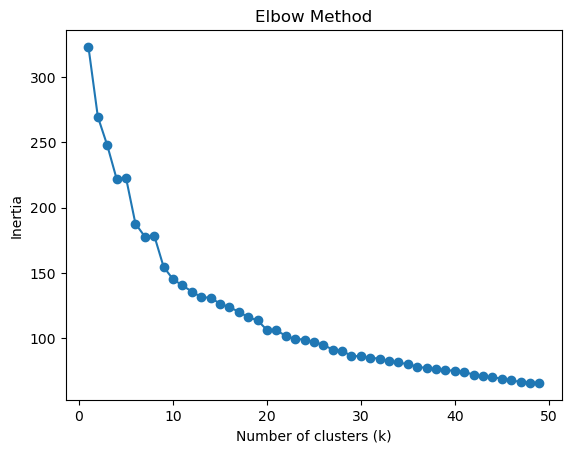

In [ ]:
# Elbow method to determine ideal cluster size -> Note I am getting the cut iff to be 15.
# Calculate inertia for k=1 to 50
inertias = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np.array(microbe_data))
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 50), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=15, random_state=42, n_init="auto").fit(np.array(microbe_data))
kmeans.cluster_centers_


centorid_distances = cdist(np.array(microbe_data),kmeans.cluster_centers_,"euclidean")
closet_indices = np.argmin(centorid_distances,axis=0)

augment_data = pd.concat([microbe_data,pd.DataFrame(centorid_distances)],axis=1)
augment_data

,Acidovorax ebreus,Acidovorax sp. JS42,Acidovorax sp. KKS102,Acinetobacter baumannii,Acinetobacter haemolyticus,Acinetobacter johnsonii,Acinetobacter junii,Acinetobacter pittii,Acinetobacter schindleri,Acinetobacter sp. LoGeW2-3,...,5,6,7,8,9,10,11,12,13,14
0,0.00000,0.00000,0.00023,0.00015,0.00000,0.00006,0.00001,0.00007,0.00010,0.00005,...,0.520114,0.507450,0.550363,0.357396,0.438075,0.576814,0.709713,0.397014,0.546556,0.458343
1,0.00000,0.00001,0.00003,0.00028,0.00016,0.00142,0.00017,0.00013,0.00262,0.00140,...,0.634177,0.626626,0.660981,0.510492,0.572373,0.682677,0.799624,0.540779,0.659134,0.586014
2,0.00003,0.00000,0.00011,0.00181,0.00060,0.00274,0.00030,0.00110,0.00191,0.00132,...,0.440937,0.429635,0.468738,0.232203,0.344387,0.509370,0.656040,0.289831,0.474946,0.308459
3,0.00000,0.00000,0.00000,0.00002,0.00001,0.00003,0.00000,0.00000,0.00003,0.00001,...,0.574740,0.567942,0.608591,0.438463,0.508287,0.628488,0.755084,0.472688,0.604349,0.175754
4,0.00000,0.00000,0.00000,0.00003,0.00000,0.00000,0.00000,0.00002,0.00009,0.00001,...,0.592451,0.583026,0.620675,0.458743,0.524744,0.647001,0.766150,0.490668,0.618294,0.233432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,0.00044,0.00052,0.00019,0.00072,0.00015,0.01410,0.00036,0.00046,0.00052,0.00024,...,0.335675,0.498565,0.557817,0.343037,0.393140,0.592058,0.365881,0.243661,0.524719,0.498838
4066,0.00000,0.00000,0.00022,0.00014,0.00000,0.00019,0.00000,0.00000,0.00000,0.00000,...,0.442085,0.431791,0.489393,0.250152,0.349200,0.524742,0.648107,0.293467,0.479045,0.417771
4067,0.00003,0.00002,0.00002,0.00018,0.00009,0.00055,0.00006,0.00019,0.00009,0.00001,...,0.344581,0.362908,0.427041,0.068405,0.244216,0.467966,0.546102,0.112826,0.411646,0.343418
4068,0.00026,0.00038,0.00051,0.00009,0.00000,0.00025,0.00004,0.00010,0.00006,0.00000,...,0.350982,0.378644,0.439209,0.127634,0.271976,0.478112,0.607567,0.195769,0.424856,0.357253
